In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat
import numpy as np
import plotly.express as pt

In [ ]:
# loading dataset
df1=pd.read_csv("dataset1.csv")



In [3]:
df2=pd.read_csv("dataset2.csv")

In [4]:
print(f"Length of dataset one is {len(df1)}")
print(f"Length of dataset two is {len(df2)}")


Length of dataset one is 907
Length of dataset two is 2123


## Initial data exploration

In [5]:
#dealing with df1 first
df1.head()

start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  30/12/2017 16:45            3.107500       0  
3  30/12/2017 16:45            3.126944       0  
4  30/12/2017 16:45            3.150000       0

In [6]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object

In [7]:
#checking for null values
df1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [8]:
#as we can see there are some values that are terribly encoded under the habit column
#Thus we will identify columns with similar problems and fix them in the data cleaner function
df1["habit"].value_counts().to_frame()

count
habit                                                
fast                                              245
rat                                               221
pick                                              139
bat                                                30
bat_fight                                          26
...                                               ...
eating_and_bat_and_pick                             1
bat_figiht                                          1
415.0,86.5,559.2,140.2; 66.0,157.0,285.0,279.0      1
rat_pick_and_bat                                    1
rat_and_bat_and_pick                                1

[81 rows x 1 columns]

In [9]:
cat_columns=['start_time', 'habit', 'rat_period_start', 'rat_period_end', 'risk',
       'reward', 'month', 'sunset_time', 'season', 'start_date']

After going through the cat columns, only habit has terribly encoded data

In [10]:
#creating a list for habit and manually identifying terrible words
df1["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', nan,
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and

In [11]:
wrong_encoded=0
for n in df1["habit"]:
    try: 
        if type(int(n[0]))==int:
            wrong_encoded+=1
    except:
        pass
count=len(df1["habit"])        
print(f"The total number of terribly encoded {wrong_encoded}, out of {count}")        

    

The total number of terribly encoded 17, out of 907


In [12]:
#function to change datatypes and clean data
def df1_data_cleaner(df):
    #the function will convert risk, reward, month and season to respective categories
    #it will then move to extract the time from start_time, rat_period_start, rat_period_end and sunset_time
    #next it will create a column called start date which will be the dates in start time,then start time will just have the time 
    #The next step is to remove all terribly encoded data 
    #Then remov null values from habit, considering they are a small number of null values, we can discard them 

    df["rat_period_start_hour"]=df["rat_period_start"].apply(lambda x: x.split(" ")[1])
    df["rat_period_end_hour"]=df["rat_period_end"].apply(lambda x: x.split(" ")[1])
    df["start_clock_time"]=df["start_time"].apply(lambda x: x.split(" ")[1])
    df["start_time_hour"]=df["start_clock_time"].apply(lambda x: x.split(":")[0])
    df["sunset_time_hour"]=df["sunset_time"].apply(lambda x: x.split(" ")[1])

    df["rat_period_start_hour"]=df["rat_period_start_hour"].apply(lambda x: x.split(":")[0])
    df["rat_period_end_hour"]=df["rat_period_end_hour"].apply(lambda x: x.split(":")[0])
    df["sunset_time_hour"]=df["sunset_time_hour"].apply(lambda x: x.split(":")[0])
    df["start_time"]=pd.to_datetime(df["start_time"],utc=True)
    df["rat_period_start"]=pd.to_datetime(df["rat_period_start"],utc=True)
    df["rat_period_end"]=pd.to_datetime(df["rat_period_end"],utc=True)
        
    df["risk"]=df["risk"].astype(str)
    df["reward"]=df["reward"].astype(str)
    df["month"]=df["month"].astype(str)
    df["season"]=df["season"].astype(str)
    df["time_diff"]=df["start_time"] -df["rat_period_start"]
    df["time_diff"]

    

    bad_data_index_list=[]
    for n in df["habit"]:
        try: 
            if type(int(n[0]))==int:
                index_value=df.loc[df["habit"]==n].index.values[0]
                bad_data_index_list.append(index_value)
        except:
            pass
           
    df.drop(index=bad_data_index_list,inplace=True)
    df.dropna(inplace=True)
    return df
    
df1_cleaned=df1_data_cleaner(df1).copy()    
    
    

C:\Users\SWRM\AppData\Local\Temp\ipykernel_3172\4208695194.py:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["start_time"]=pd.to_datetime(df["start_time"],utc=True)
C:\Users\SWRM\AppData\Local\Temp\ipykernel_3172\4208695194.py:19: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["rat_period_start"]=pd.to_datetime(df["rat_period_start"],utc=True)
C:\Users\SWRM\AppData\Local\Temp\ipykernel_3172\4208695194.py:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["rat_period_end"]=pd.to_datetime(df["rat_period_end"],utc=True)


In [13]:
df1_cleaned.isnull().sum()

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
rat_period_start_hour        0
rat_period_end_hour          0
start_clock_time             0
start_time_hour              0
sunset_time_hour             0
time_diff                    0
dtype: int64

In [14]:
df1_cleaned["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat', 'rat attack', 'attack_rat', 'bat_and_rat',
       'rat_attack', 'other_bats', 'rat_pick', 'rat_and_bat', 'bowl_out',
       'other_bat', 'other', 'eating', 'rat_to_bat', 'other_bats/rat',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       'pick_and_bat', 'eating_and_bat_and_pick', 'bat_figiht',
       'bat_pick_rat', 'rat_pick_and_bat', 'pick_and_rat', 'fight_rat',
       'all_pick', 'no_food', 'bats', 'others', 'rat_and_pick',
       'pick_rat_bat', 'bat_and_pick_far', 'fast_far', 'fight',
       'bat_rat_pick', 'bat_pick', 'rat_disappear', 'eating_bat_rat_pick',
       'fast_and_pick', 'other directions', 'bat_fight_rat', 'bat_rat',
       'pup_and_mon', 'pick_eating_all', 'pick_bat_rat', 'rat_bat',
       'rat_bat_fight', 'eating_bat_pick', 'pick_rat_and_bat',
       'fight_bat', 'bat_fight_and_rat', 'rat_and

## Numerical data cleaning

In [15]:
#selecting numerical data
df1_cleaned.select_dtypes(["int","float"]).columns

Index(['bat_landing_to_food', 'seconds_after_rat_arrival',
       'hours_after_sunset'],
      dtype='object')

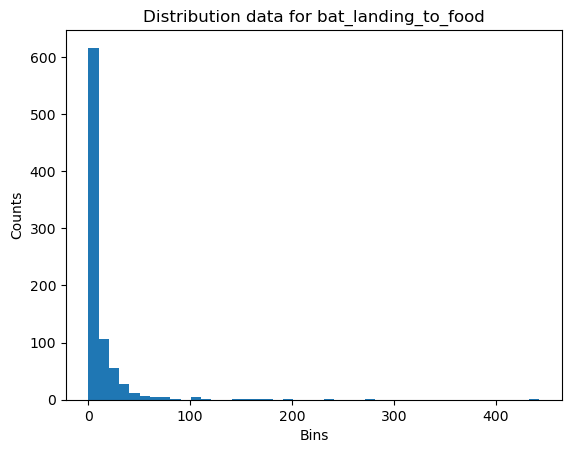

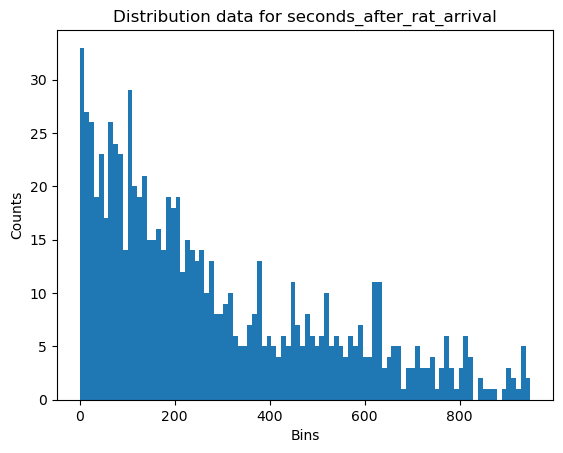

In [16]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    range=df1_cleaned[n].max() - df1_cleaned[n].min()
    bin_width=10
    bins=int(range/bin_width)
    plt.hist(df1_cleaned[n],bins=bins)
    plt.title(f"Distribution data for {n}")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.show()

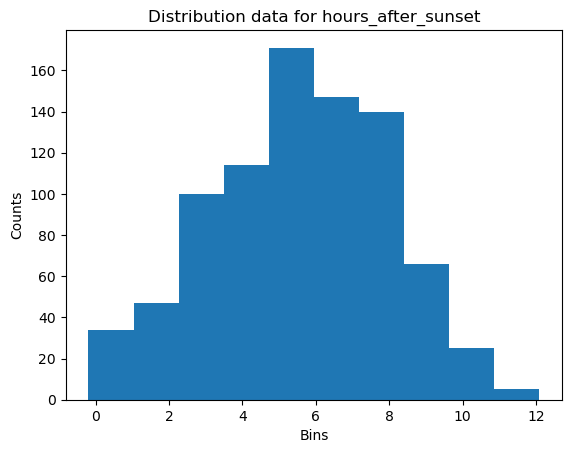

In [17]:
#histogram for hours after sunset
plt.hist(df1_cleaned["hours_after_sunset"])
plt.title("Distribution data for hours_after_sunset")
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.show()

bat_landing_to_food and seconds_after_rat_arrival are rightly skewed, hence they have some extreme positive values that deviate from the normal distribution. Next, I will visual using a boxplot and get a total estimate of how many outliers are in the two columns

The last column, hours after sunset is normally distributed.

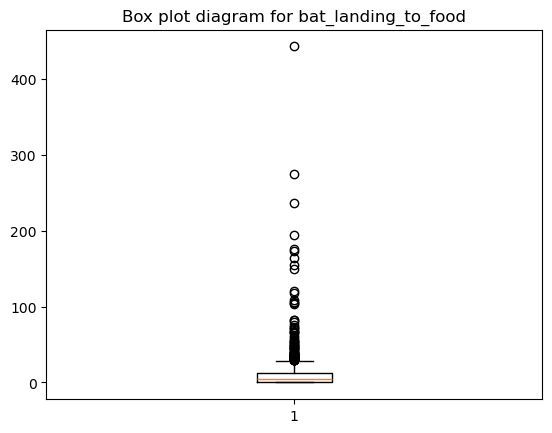

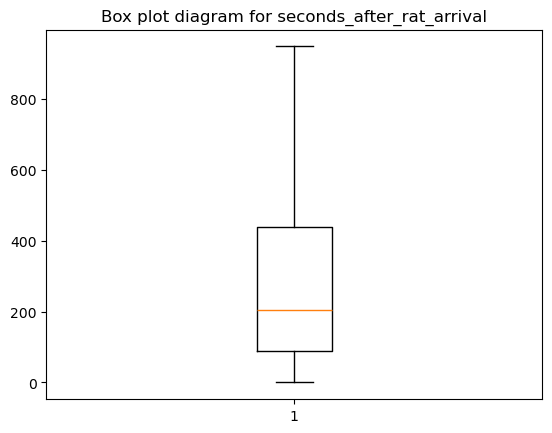

In [18]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    plt.boxplot(df1_cleaned[n])
    plt.title(f"Box plot diagram for {n}")
    plt.show()

In [19]:
#using IQR to get the percentage of outliers in the first column
def IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3 - q1
    lower_bound=q1 - IQR*1.5
    upper_bound=q3 + IQR*1.5
    outlier_df=df.loc[(df[column_name]<lower_bound) | (df[column_name]>upper_bound)]
    outlier_count=len(outlier_df)
    outlier_percentage_count=(outlier_count/len(df))*100
    print(f"The total number of outliers in {column_name} is {outlier_count} which consists of {outlier_percentage_count} %") 
    #removing outliers
    cleaned_df=df.loc[(df[column_name]>=lower_bound) & (df[column_name]<=upper_bound)]
    return cleaned_df
df=IQR(df1_cleaned,'bat_landing_to_food').copy()
  
    

The total number of outliers in bat_landing_to_food is 80 which consists of 9.422850412249705 %


In [20]:
df.columns

Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season',
       'rat_period_start_hour', 'rat_period_end_hour', 'start_clock_time',
       'start_time_hour', 'sunset_time_hour', 'time_diff'],
      dtype='object')

## Df 2 cleaning

In [21]:
df2

time  month  hours_after_sunset  bat_landing_number  \
0     26/12/2017 16:13      0                -0.5                  20   
1     26/12/2017 16:43      0                 0.0                  28   
2     26/12/2017 17:13      0                 0.5                  25   
3     26/12/2017 17:43      0                 1.0                  71   
4     26/12/2017 18:13      0                 1.5                  44   
...                ...    ...                 ...                 ...   
2118    1/06/2018 3:41      6                 8.0                  20   
2119    1/06/2018 4:11      6                 8.5                   7   
2120    1/06/2018 4:41      6                 9.0                   6   
2121    1/06/2018 5:11      6                 9.5                   7   
2122    1/06/2018 5:41      6                10.0                   2   

      food_availability  rat_minutes  rat_arrival_number  
0              4.000000          0.0                   0  
1              4.000000          0.0                   0  
2              4.000000          0.0                   0  
3              4.000000          0.0                   0  
4              3.753857          0.0                   0  
...                 ...          ...                 ...  
2118           1.000000          0.0                   0  
2119           1.000000          0.0                   0  
2120           1.000000          0.0                   0  
2121           1.000000          0.0                   0  
2122           1.000000          0.0                   0  

[2123 rows x 7 columns]

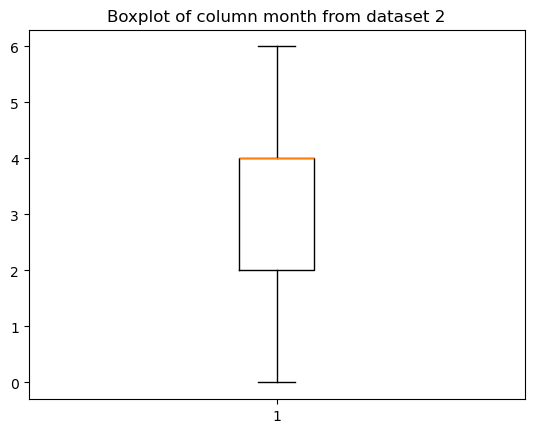

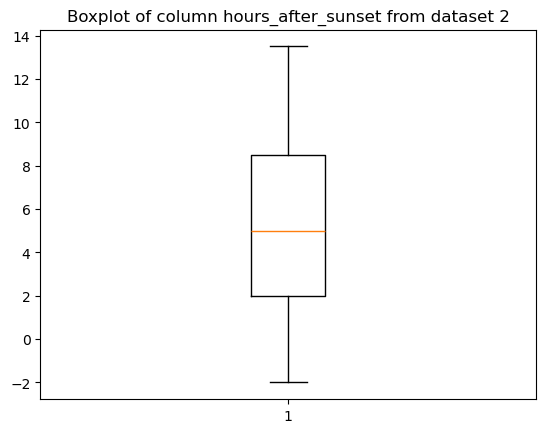

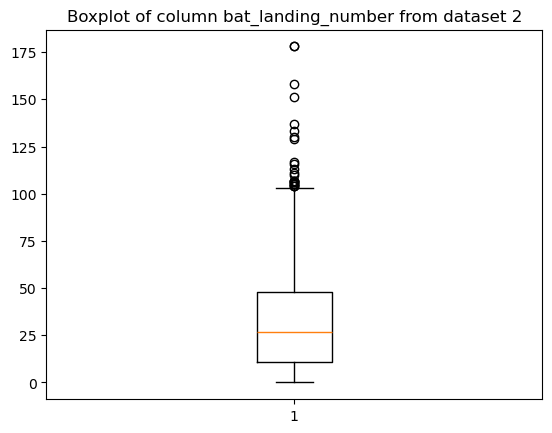

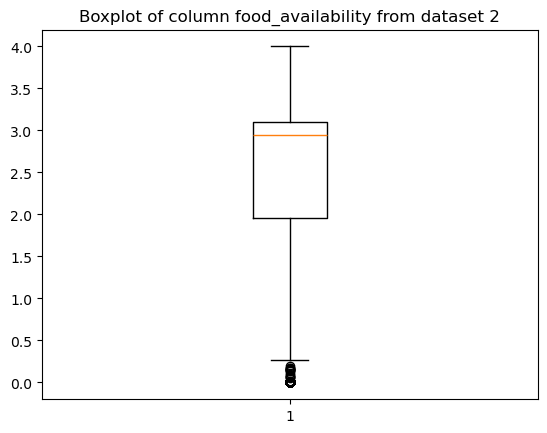

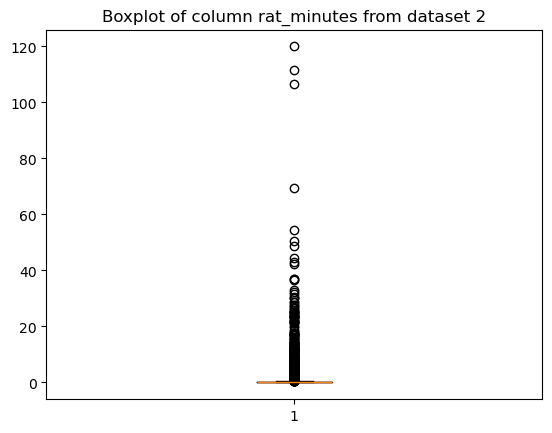

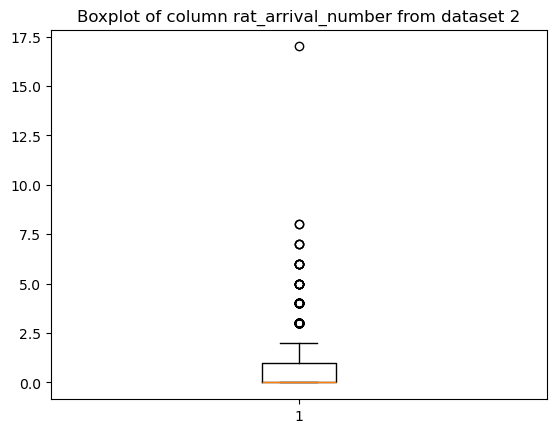

In [22]:
for n in df2.select_dtypes([int,float]).columns:
    plt.boxplot(df2[n])
    plt.title(f"Boxplot of column {n} from dataset 2")
    plt.show()

In [23]:
for n in ['bat_landing_number',
       'food_availability', 'rat_minutes', 'rat_arrival_number']:
    df2_semi=IQR(df2,n).copy()

The total number of outliers in bat_landing_number is 24 which consists of 1.1304757418747056 %
The total number of outliers in food_availability is 202 which consists of 9.514837494112104 %
The total number of outliers in rat_minutes is 511 which consists of 24.06971267074894 %
The total number of outliers in rat_arrival_number is 92 which consists of 4.333490343853038 %


In [24]:
df2_semi

time  month  hours_after_sunset  bat_landing_number  \
0     26/12/2017 16:13      0                -0.5                  20   
1     26/12/2017 16:43      0                 0.0                  28   
2     26/12/2017 17:13      0                 0.5                  25   
3     26/12/2017 17:43      0                 1.0                  71   
4     26/12/2017 18:13      0                 1.5                  44   
...                ...    ...                 ...                 ...   
2118    1/06/2018 3:41      6                 8.0                  20   
2119    1/06/2018 4:11      6                 8.5                   7   
2120    1/06/2018 4:41      6                 9.0                   6   
2121    1/06/2018 5:11      6                 9.5                   7   
2122    1/06/2018 5:41      6                10.0                   2   

      food_availability  rat_minutes  rat_arrival_number  
0              4.000000          0.0                   0  
1              4.000000          0.0                   0  
2              4.000000          0.0                   0  
3              4.000000          0.0                   0  
4              3.753857          0.0                   0  
...                 ...          ...                 ...  
2118           1.000000          0.0                   0  
2119           1.000000          0.0                   0  
2120           1.000000          0.0                   0  
2121           1.000000          0.0                   0  
2122           1.000000          0.0                   0  

[2031 rows x 7 columns]

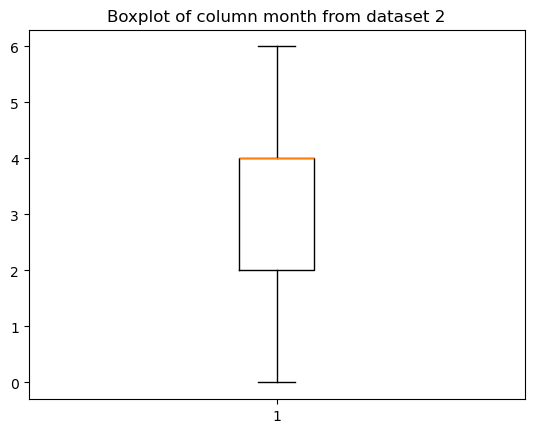

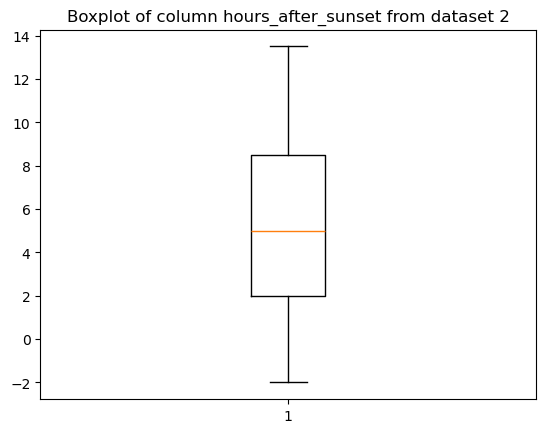

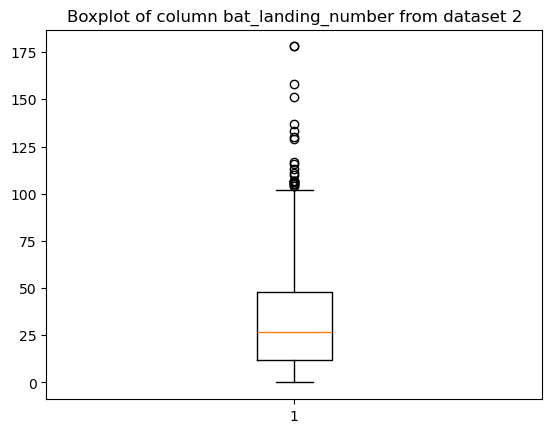

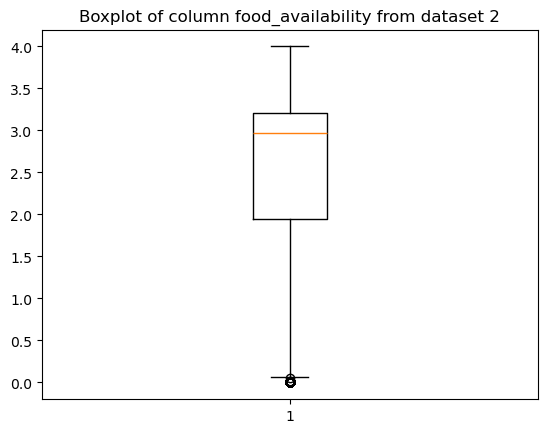

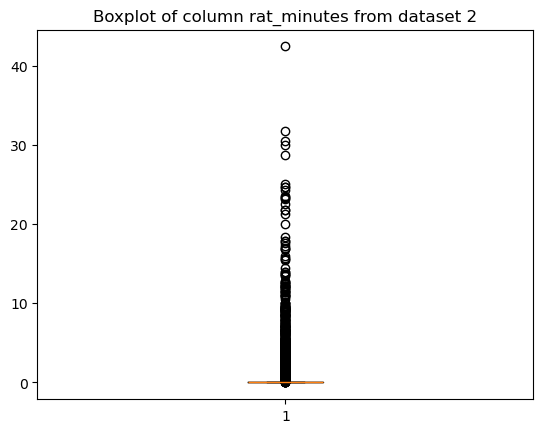

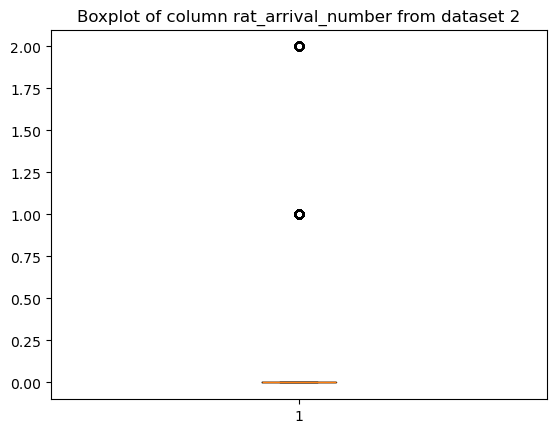

In [25]:
for n in df2_semi.select_dtypes([int,float]).columns:
    plt.boxplot(df2_semi[n])
    plt.title(f"Boxplot of column {n} from dataset 2")
    plt.show()

In [26]:
df2_semi.describe()

month  hours_after_sunset  bat_landing_number  food_availability  \
count  2031.000000         2031.000000         2031.000000        2031.000000   
mean      3.034958            5.211226           32.382078           2.450561   
std       1.649379            4.100215           25.579794           1.231170   
min       0.000000           -2.000000            0.000000           0.000000   
25%       2.000000            2.000000           12.000000           1.951075   
50%       4.000000            5.000000           27.000000           2.970430   
75%       4.000000            8.500000           48.000000           3.208781   
max       6.000000           13.500000          178.000000           4.000000   

       rat_minutes  rat_arrival_number  
count  2031.000000         2031.000000  
mean      1.239792            0.281142  
std       3.587082            0.564320  
min       0.000000            0.000000  
25%       0.000000            0.000000  
50%       0.000000            0.000000  
75%       0.000000            0.000000  
max      42.433333            2.000000

Even though there are outliers in df2_semi, I will keep them because they don't appear to be wrongly encoded. Another reason is, if we did remove all the outliers from the data, this dataframe would be useless as it wouldn't have any information to analyze.

## Feature engineering for df2_semi

In [27]:

df2_semi['date']=df2_semi["time"].apply(lambda x: x.split(" ")[0])
df2_semi['time_hour']=df2_semi["time"].apply(lambda x: x.split(" ")[1])
df2_semi['hour']=df2_semi["time_hour"].apply(lambda x: x.split(":")[0])
df2_semi["hour"]=df2_semi["hour"].astype("int")

df2_semi["time"]=pd.to_datetime(df2_semi["time"],utc=True)



C:\Users\SWRM\AppData\Local\Temp\ipykernel_3172\2598718932.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2_semi["time"]=pd.to_datetime(df2_semi["time"],utc=True)


## EDA

## How to push code to GitHub

1. Open your terminal and navigate to your project directory.
2. Run `git status` to see your changes.
3. Add your changes: `git add .`
4. Commit your changes: `git commit -m "Your commit message"`
5. Push to GitHub: `git push origin <branch-name>`

Replace `<branch-name>` with the name of your current branch (e.g., `main` or `master`).

# **Validating The Cleaning Steps**

## Distribution Comparison: Before vs After Cleaning

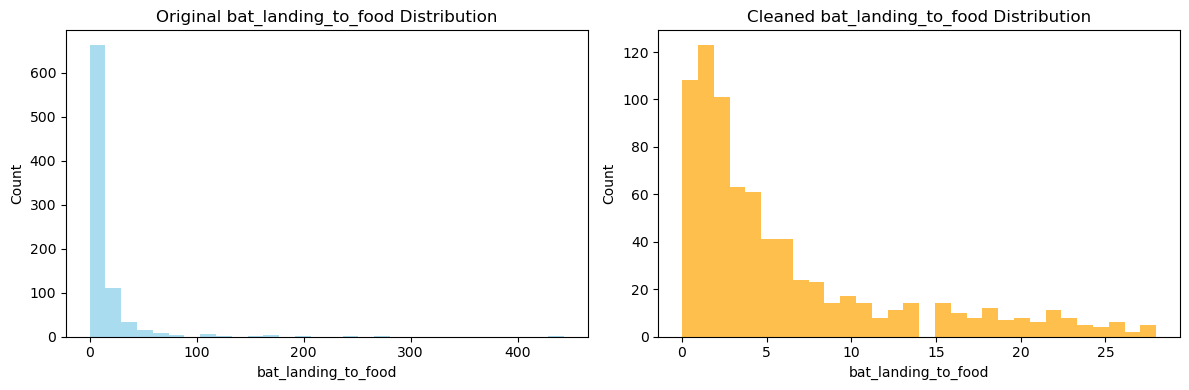

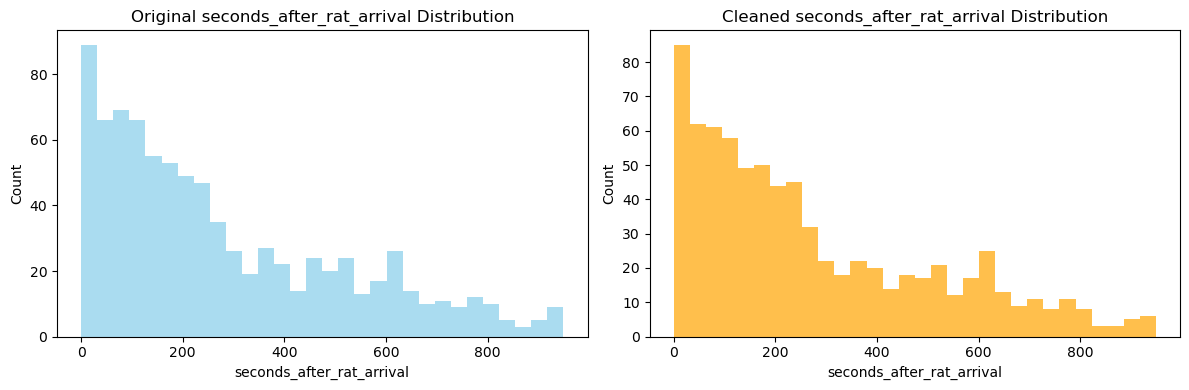

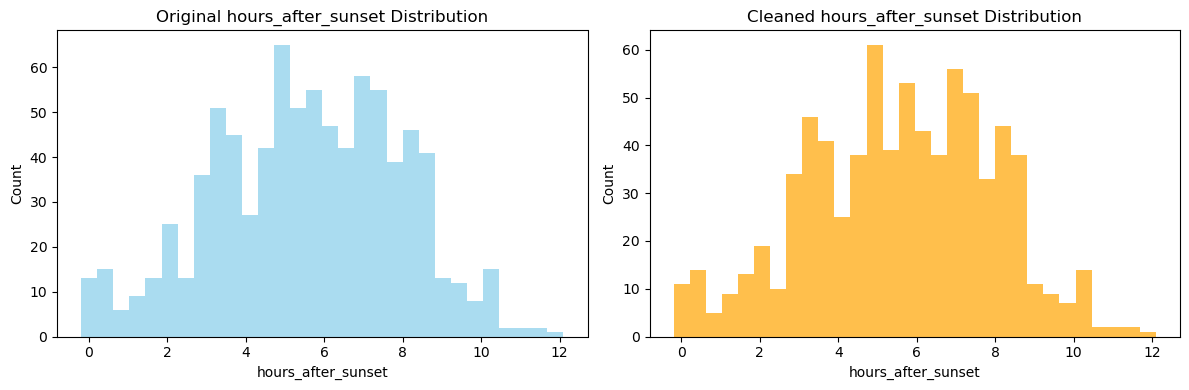

In [28]:
# Compare distributions for 'bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset'
columns_to_compare = ["bat_landing_to_food", "seconds_after_rat_arrival", "hours_after_sunset"]
for col in columns_to_compare:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df1[col].dropna(), bins=30, color='skyblue', alpha=0.7)
    axes[0].set_title(f"Original {col} Distribution")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    axes[1].hist(df[col].dropna(), bins=30, color='orange', alpha=0.7)
    axes[1].set_title(f"Cleaned {col} Distribution")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

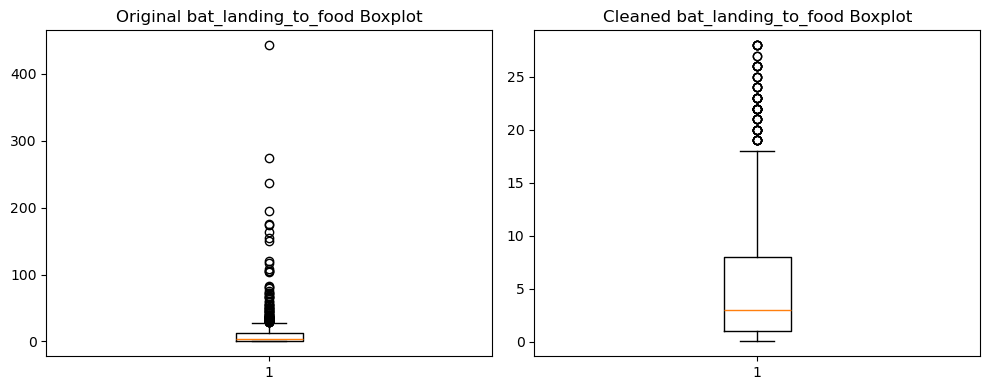

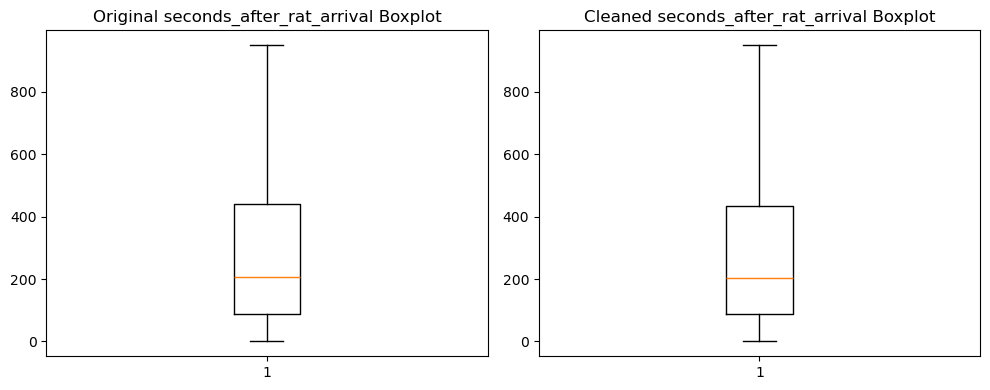

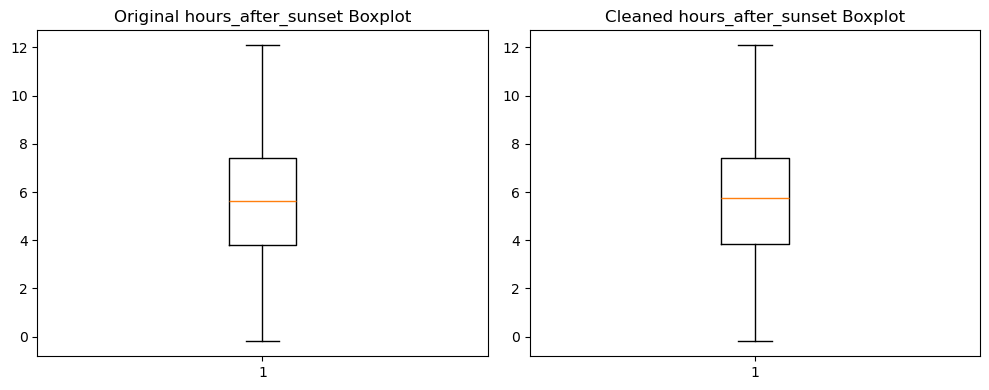

In [29]:
# Compare boxplots for the same columns
for col in columns_to_compare:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].boxplot(df1[col].dropna())
    axes[0].set_title(f"Original {col} Boxplot")
    axes[1].boxplot(df[col].dropna())
    axes[1].set_title(f"Cleaned {col} Boxplot")
    plt.tight_layout()
    plt.show()

In [30]:
# Check for class imbalance in categorical columns before and after cleaning
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    print(f"--- {col} ---")
    print("Original value counts:")
    print(df1[col].value_counts(normalize=True))
    print("Cleaned value counts:")
    print(df[col].value_counts(normalize=True))
    print()

--- habit ---
Original value counts:
habit
fast                       0.288575
rat                        0.260306
pick                       0.163722
bat                        0.035336
bat_fight                  0.030624
                             ...   
eating_and_bat_and_pick    0.001178
bat_figiht                 0.001178
bat_pick_rat               0.001178
pick_rat_bat               0.001178
rat_and_bat_and_pick       0.001178
Name: proportion, Length: 64, dtype: float64
Cleaned value counts:
habit
fast                    0.318596
rat                     0.266580
pick                    0.167750
bat                     0.033810
bat_fight               0.029909
bat_and_pick            0.022107
bat_and_rat             0.019506
rat_and_bat             0.015605
rat_pick                0.010403
bats                    0.009103
pick_and_others         0.009103
other_bats              0.007802
pick_and_bat            0.007802
others                  0.006502
pick_and_rat            0.

✅ Observations:

Columns checked:
start_time, habit, rat_period_start, rat_period_end, risk, reward, month, sunset_time, season, start_date.

Result:

For every column, original value counts and cleaned value counts match exactly (including percentages and number of unique values).

This suggests no rows were dropped or only non-categorical columns were modified during cleaning.

# Checking for Duplicates 

In [31]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 1


In [32]:
df[df1_cleaned.duplicated(keep=False)]


C:\Users\SWRM\AppData\Local\Temp\ipykernel_3172\36966847.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df1_cleaned.duplicated(keep=False)]


start_time  bat_landing_to_food      habit  \
563 2018-04-28 00:10:00+00:00                  5.0  bat_fight   
564 2018-04-28 00:10:00+00:00                  5.0  bat_fight   

             rat_period_start            rat_period_end  \
563 2018-04-28 00:04:00+00:00 2018-04-28 00:14:00+00:00   
564 2018-04-28 00:04:00+00:00 2018-04-28 00:14:00+00:00   

     seconds_after_rat_arrival risk reward month      sunset_time  \
563                        365    1      0     4  27/4/2018 19:18   
564                        365    1      0     4  27/4/2018 19:18   

     hours_after_sunset season rat_period_start_hour rat_period_end_hour  \
563            4.882778      1                    00                  00   
564            4.882778      1                    00                  00   

    start_clock_time start_time_hour sunset_time_hour       time_diff  
563            00:10              00               19 0 days 00:06:00  
564            00:10              00               19 0 days 00:06:00

row 564 is a complete duplicate of row 563—all column values are identical.

## **Univariate Analysis**

habit
fast                    245
rat                     205
pick                    129
bat                      26
bat_fight                23
bat_and_pick             17
bat_and_rat              15
rat_and_bat              12
rat_pick                  8
bats                      7
pick_and_others           7
other_bats                6
pick_and_bat              6
others                    5
pick_and_rat              5
pick_bat                  5
no_food                   4
rat_and_pick              4
pick_rat                  3
bat_pick                  2
fight                     2
pick_and_all              2
bat_and_pick_far          1
fast_far                  1
not_sure_rat              1
bat_rat_pick              1
rat_disappear             1
pick_rat_and_bat          1
fast_and_pick             1
bat_fight_and_rat         1
bat_rat                   1
pup_and_mon               1
pick_bat_rat              1
rat_bat                   1
other directions          1
attack_rat    

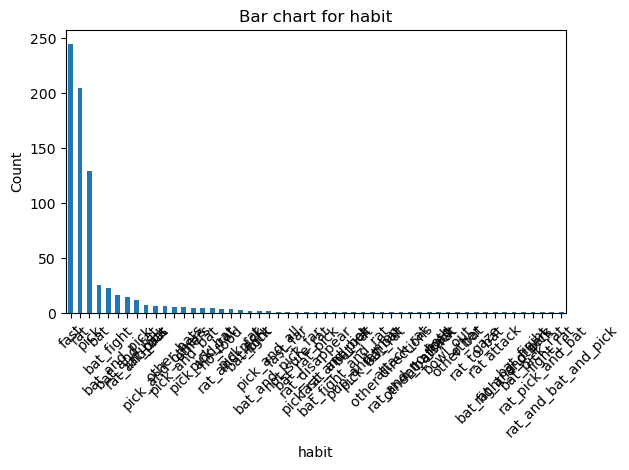

risk
0    386
1    383
Name: count, dtype: int64


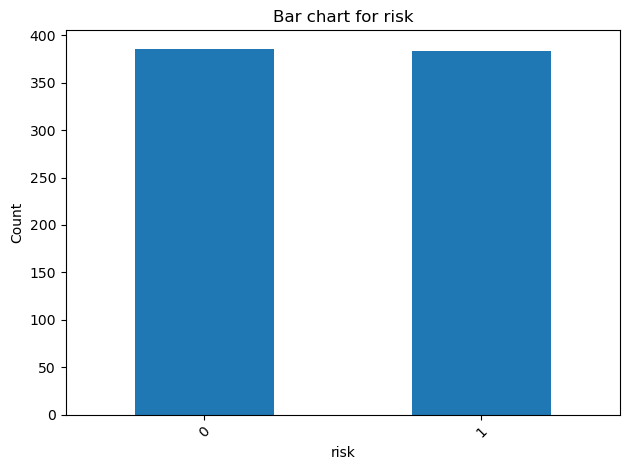

reward
1    443
0    326
Name: count, dtype: int64


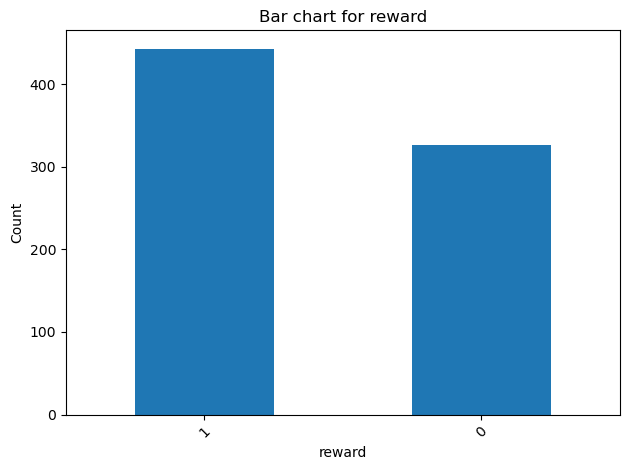

month
4    433
5    176
2     82
1     31
3     24
0     23
Name: count, dtype: int64


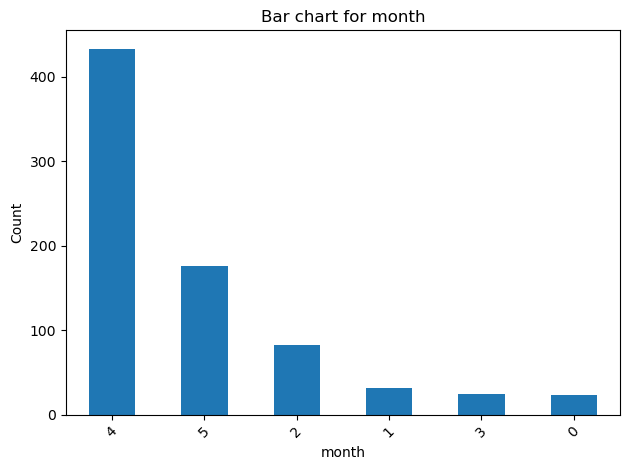

sunset_time
26/4/2018 19:17     85
28/4/2018 19:19     63
27/4/2018 19:18     49
19/4/2018 19:12     46
2/4/2018 19:01      37
29/4/2018 19:19     37
30/4/2018 19:20     35
21/4/2018 19:14     32
20/4/2018 19:13     28
3/5/2018 19:22      27
1/5/2018 19:21      26
5/5/2018 19:24      23
3/4/2018 19:01      22
10/2/2018 17:22     17
28/1/2018 17:10     16
2/5/2018 19:21      15
28/3/2018 18:57     15
4/5/2018 19:23      13
9/2/2018 17:21      12
22/4/2018 19:14     12
27/1/2018 17:09     11
8/5/2018 19:26      11
7/2/2018 17:19      10
10/5/2018 19:27      9
14/2/2018 17:26      9
18/4/2018 19:12      8
26/12/2017 16:43     8
6/5/2018 19:24       7
17/5/2018 19:32      7
30/12/2017 16:45     7
8/2/2018 17:20       7
28/12/2017 16:44     6
15/2/2018 17:26      6
16/2/2018 17:27      5
13/5/2018 19:29      4
7/5/2018 19:25       4
18/3/2018 17:50      4
17/2/2018 17:28      4
30/3/2018 18:59      3
19/2/2018 17:30      3
31/1/2018 17:13      2
18/2/2018 17:29      2
27/12/2017 16:43     2

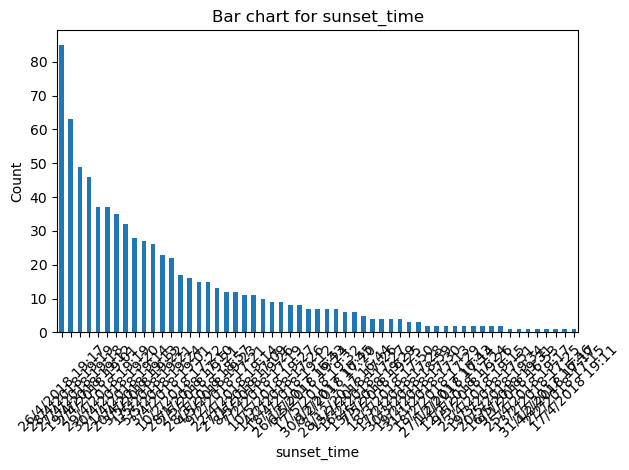

season
1    633
0    136
Name: count, dtype: int64


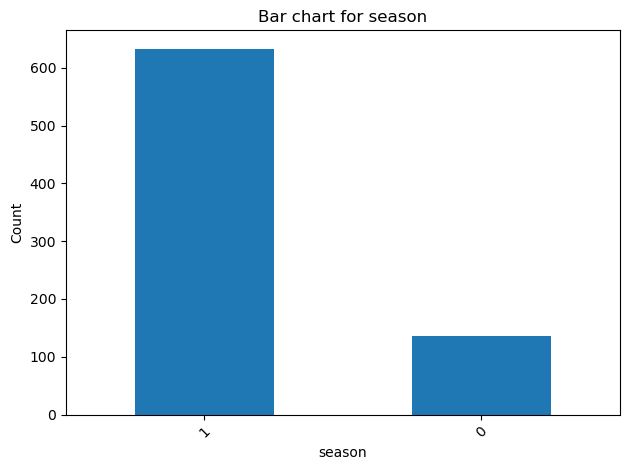

rat_period_start_hour
00    133
02    109
01    108
23     86
03     84
22     71
21     56
19     53
04     22
20     20
18     13
05     13
17      1
Name: count, dtype: int64


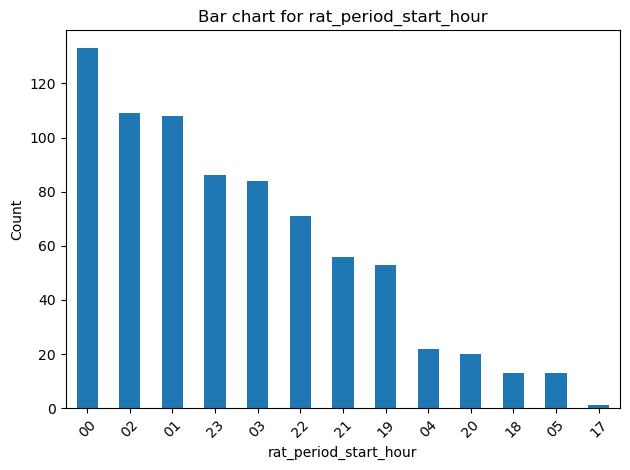

rat_period_end_hour
00    133
02    111
23     94
03     93
01     90
22     75
21     48
19     40
20     32
04     27
05     15
18      8
06      2
17      1
Name: count, dtype: int64


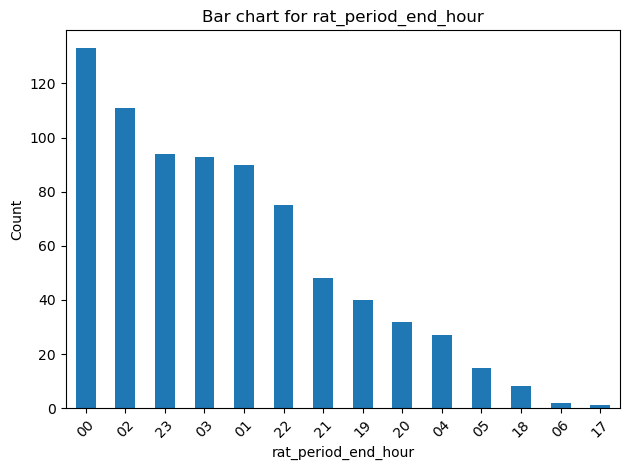

start_clock_time
00:49    10
00:51     9
00:44     8
00:11     7
01:03     7
         ..
04:00     1
19:30     1
19:59     1
20:00     1
04:19     1
Name: count, Length: 366, dtype: int64


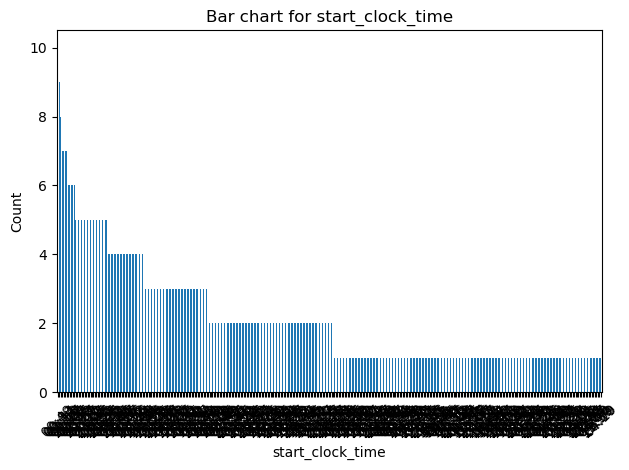

start_time_hour
00    131
02    117
01     93
23     91
03     90
22     77
21     48
19     44
20     31
04     21
05     17
18      8
17      1
Name: count, dtype: int64


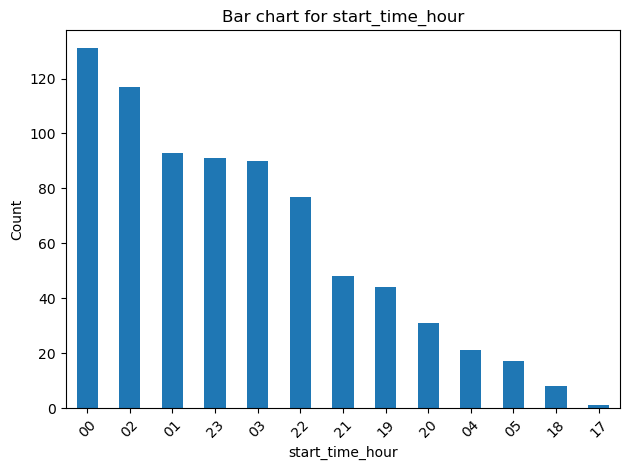

sunset_time_hour
19    609
17    117
16     25
18     18
Name: count, dtype: int64


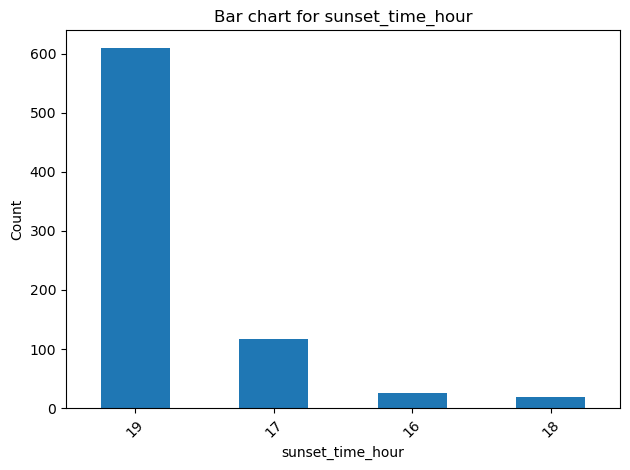

In [33]:
# Univariate Analysis for Categorical Features
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Univariate Analysis for Numerical Features: Skewness and Kurtosis



In [34]:
#numeric data analysis
df.describe()

bat_landing_to_food  seconds_after_rat_arrival  hours_after_sunset  \
count           769.000000                 769.000000          769.000000   
mean              5.967358                 275.405722            5.579613   
std               6.728728                 234.746532            2.385823   
min               0.010238                   0.000000           -0.198611   
25%               1.000000                  87.000000            3.824167   
50%               3.000000                 202.000000            5.735278   
75%               8.000000                 434.000000            7.415278   
max              28.000000                 949.000000           12.091944   

                       time_diff  
count                        769  
mean   0 days 00:04:36.436931079  
std    0 days 00:03:57.224174237  
min              0 days 00:00:00  
25%              0 days 00:01:00  
50%              0 days 00:03:00  
75%              0 days 00:07:00  
max              0 days 00:16:00

## Dataset 2 univariant analysis

In [35]:

df2_semi.head()

time  month  hours_after_sunset  bat_landing_number  \
0 2017-12-26 16:13:00+00:00      0                -0.5                  20   
1 2017-12-26 16:43:00+00:00      0                 0.0                  28   
2 2017-12-26 17:13:00+00:00      0                 0.5                  25   
3 2017-12-26 17:43:00+00:00      0                 1.0                  71   
4 2017-12-26 18:13:00+00:00      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number        date time_hour  \
0           4.000000          0.0                   0  26/12/2017     16:13   
1           4.000000          0.0                   0  26/12/2017     16:43   
2           4.000000          0.0                   0  26/12/2017     17:13   
3           4.000000          0.0                   0  26/12/2017     17:43   
4           3.753857          0.0                   0  26/12/2017     18:13   

   hour  
0    16  
1    16  
2    17  
3    17  
4    18

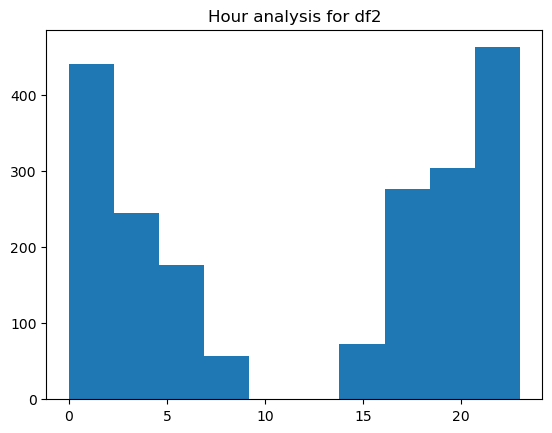

hour
23    156
21    153
22    153
19    152
20    151
1     149
0     149
18    145
2     142
3     133
17    131
4     112
5     100
6      76
16     53
7      35
8      22
15     17
14      2
Name: count, dtype: int64

In [36]:
plt.hist(df2_semi["hour"])
plt.title("Hour analysis for df2")
plt.show()

df2_semi["hour"].value_counts()

This is interesting, we see two instances of rat occurrences in terms of arrival. They mainly arrive between 00:00 to 5:00 and then later from 17:00 to 23:00. But between 6 to 14:00, there aren't present. In addition to that, there's isn't much variation amongst the hours the actually show up.

In contrast to bats, rats have a wider activity time compared to bats, as bats mainly show up between 21:00 to 03:00. Could this be a possible indicator that bats are afraid of rats.

However, lets no jump straight to conclusion that rats arrive earlier that bats, lets group by hour and analyze arrival number during bivariate analysis

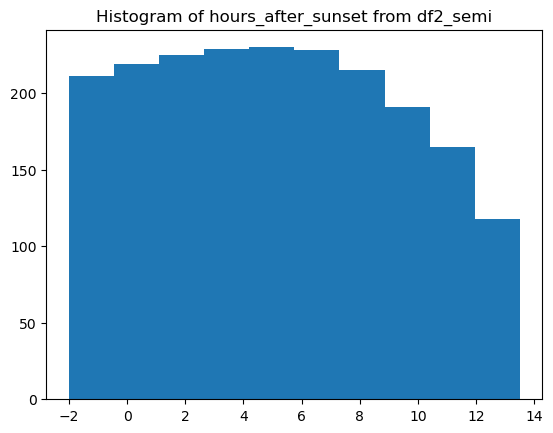

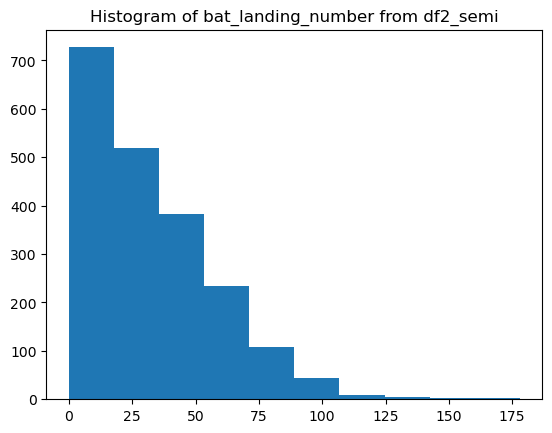

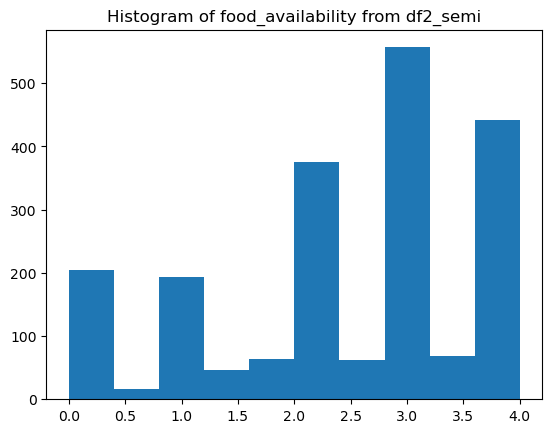

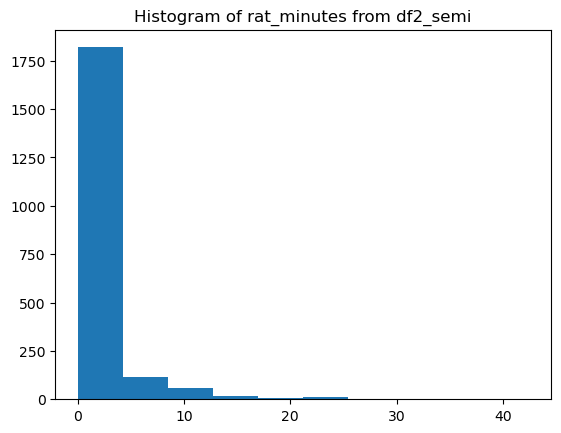

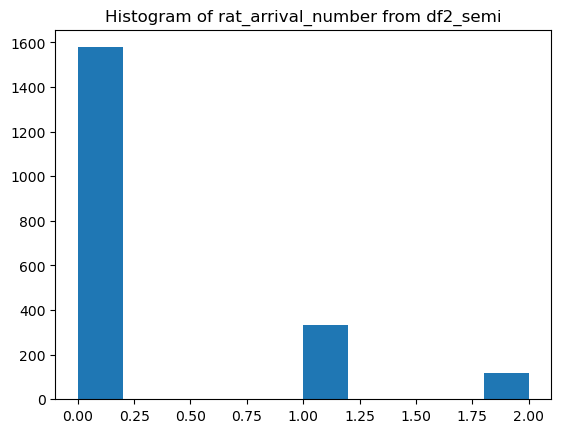

In [37]:
for n in ['hours_after_sunset', 'bat_landing_number',
       'food_availability', 'rat_minutes', 'rat_arrival_number']:
    #range=df2[n].max() - df2[n].min()
    #bin_width=10
    #bins=int(range/bin_width)
    plt.hist(df2_semi[n])
    plt.title(f"Histogram of {n} from df2_semi")
    plt.show()

The bat landing number is rightly skewed, meaning, there's an occurrence when the number of bats tend to appear more compared to others. We can investgate this based on time or month or season.

Food availability shows certain peaks where there's more food left after bat activity, this could reveal something to us, for example are these peaks because there where high number of rats present.


### Univariate Analysis Interpretation of df


- **Categorical Features:**  
  The bar charts show the frequency of each category. If one category dominates, this may indicate imbalance. For example, if most values are concentrated in a few categories, consider balancing or grouping rare categories.
 1. Start time: We created columns that would return the hour of activity for bat and rat start time and end period.
  From the data, we see that bat and rat activity is high from 12 mid night to 3 am in the morning and least common at 17 and 18 pm. Which shows that rats and bat are usually active at the same time.

2. Habit: Fast, rat and pick have the highest counts amongst other actions, with an average of 193 occurrences and multiple other actions that have only one occurence. The question then becomes, are these values important, and if we were to remove them, how much data will be left. 

3. Risk: Equal occurrence.

4. Reward: There's 57% more occurrences of reward compared to failure. We could identify the relationship between risk and reward?
   

- **Numerical Features:**  
  The histograms and computed skewness/kurtosis help assess distribution shape.  
  - High skewness (>1 or <-1) means the data is not symmetric and may benefit from transformation (log, sqrt) for modeling.
  - High kurtosis (>3) indicates heavy tails or outliers.
  - If the histogram is bell-shaped and skewness is near zero, the feature is approximately normal.

- **Next Steps:**  
  - For highly skewed features, apply transformations before modeling.
  - For imbalanced categorical features, consider resampling or grouping.

In [38]:
df.select_dtypes([object]).columns

Index(['habit', 'risk', 'reward', 'month', 'sunset_time', 'season',
       'rat_period_start_hour', 'rat_period_end_hour', 'start_clock_time',
       'start_time_hour', 'sunset_time_hour'],
      dtype='object')

In [39]:
for n in ['rat_period_start_hour', 'rat_period_end_hour', 
       'start_time_hour', 'sunset_time_hour']:
    df[n]=df[n].astype(int)

## Questions to investigate
Numeric to numeric analysis
1. Correlation map
2. Are there occurrences where bat start and rat start are different, and if so, what's the level of risk, reward, and the average bat landing to food seconds? (done) 

Categorical to categorical analysis
1. What's the level of relationship between risk and reward? (done)
2. What's the relationship between risk and habit? (done)
3. What's the relationship between reward and habit? (done)
4. Is there a variation in habit based on bat start hour? (go back to it)
   

Numeric to categorical analysis
1. If we were to create two dataframes based on our perception of short and long time periods under bat landing to food column. Could we find distinct differences in the between these two dataframes amongst the categorical columns? (done)
2. Are there any unique habit actions that occurence when the seconds after arrival is short or long? (done)
3. What's the average time difference between rat start time and end time? Are they commonly small or large, if so, what are the common habits in relation to those trends, also other columns as well


In [42]:
df["rat_start_end_diff"]=(df["rat_period_end"] - df["rat_period_start"]).dt.total_seconds()/60
df["rat_end_to_bat_start_diff"]=(df["rat_period_end"] - df["start_time"]).dt.total_seconds()/60
df["time_diff"]=df["time_diff"].dt.total_seconds()/60

# Bivariate Analysis for dataframe 1

In [43]:
df.select_dtypes([int,float]).corr()

bat_landing_to_food  seconds_after_rat_arrival  \
bat_landing_to_food                   1.000000                   0.066423   
seconds_after_rat_arrival             0.066423                   1.000000   
hours_after_sunset                   -0.012671                   0.053825   
rat_period_start_hour                 0.002199                  -0.087576   
rat_period_end_hour                  -0.008164                  -0.074535   
start_time_hour                       0.001239                  -0.077918   
sunset_time_hour                      0.073356                   0.162498   
time_diff                             0.067742                   0.994471   
rat_start_end_diff                   -0.001436                   0.599596   
rat_end_to_bat_start_diff            -0.055644                  -0.040139   

                           hours_after_sunset  rat_period_start_hour  \
bat_landing_to_food                 -0.012671               0.002199   
seconds_after_rat_arrival            0.053825              -0.087576   
hours_after_sunset                   1.000000              -0.701348   
rat_period_start_hour               -0.701348               1.000000   
rat_period_end_hour                 -0.699855               0.992010   
start_time_hour                     -0.702352               0.999548   
sunset_time_hour                    -0.009708              -0.179767   
time_diff                            0.046968              -0.087430   
rat_start_end_diff                   0.042277              -0.120072   
rat_end_to_bat_start_diff            0.015573              -0.080765   

                           rat_period_end_hour  start_time_hour  \
bat_landing_to_food                  -0.008164         0.001239   
seconds_after_rat_arrival            -0.074535        -0.077918   
hours_after_sunset                   -0.699855        -0.702352   
rat_period_start_hour                 0.992010         0.999548   
rat_period_end_hour                   1.000000         0.992497   
start_time_hour                       0.992497         1.000000   
sunset_time_hour                     -0.180952        -0.179017   
time_diff                            -0.074818        -0.077763   
rat_start_end_diff                   -0.105610        -0.114076   
rat_end_to_bat_start_diff            -0.072693        -0.080945   

                           sunset_time_hour  time_diff  rat_start_end_diff  \
bat_landing_to_food                0.073356   0.067742           -0.001436   
seconds_after_rat_arrival          0.162498   0.994471            0.599596   
hours_after_sunset                -0.009708   0.046968            0.042277   
rat_period_start_hour             -0.179767  -0.087430           -0.120072   
rat_period_end_hour               -0.180952  -0.074818           -0.105610   
start_time_hour                   -0.179017  -0.077763           -0.114076   
sunset_time_hour                   1.000000   0.166609            0.217465   
time_diff                          0.166609   1.000000            0.602129   
rat_start_end_diff                 0.217465   0.602129            1.000000   
rat_end_to_bat_start_diff          0.139707  -0.041364            0.772809   

                           rat_end_to_bat_start_diff  
bat_landing_to_food                        -0.055644  
seconds_after_rat_arrival                  -0.040139  
hours_after_sunset                          0.015573  
rat_period_start_hour                      -0.080765  
rat_period_end_hour                        -0.072693  
start_time_hour                            -0.080945  
sunset_time_hour                            0.139707  
time_diff                                  -0.041364  
rat_start_end_diff                          0.772809  
rat_end_to_bat_start_diff                   1.000000

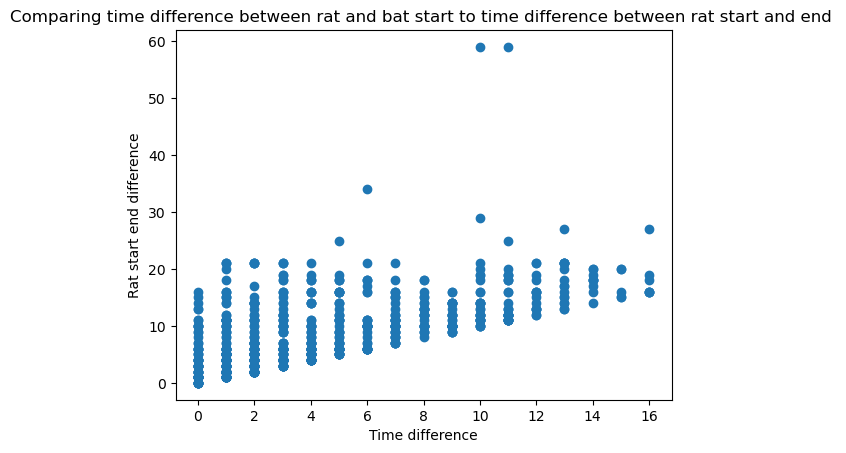

In [46]:
plt.scatter(x=df["time_diff"], y=df["rat_start_end_diff"])
plt.title("Comparing time difference between rat and bat start to time difference between rat start and end ")
plt.xlabel("Time difference")
plt.ylabel("Rat start end difference")
plt.show()

The 60% correlation states that the larger the time difference between bat and rat start time, the more time rats are present on the platform.

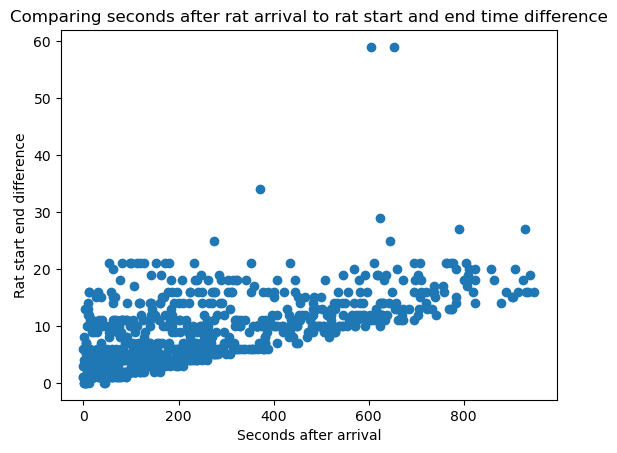

In [49]:
plt.scatter(x=df["seconds_after_rat_arrival"], y=df["rat_start_end_diff"])
plt.title("Comparing seconds after rat arrival to rat start and end time difference")
plt.xlabel("Seconds after arrival")
plt.ylabel("Rat start end difference")
plt.show()

The 59% correlation states that the larger the seconds after rat arrival, the more time rats are present on the platform.

The correlation matrix between these columns are incorrect because they don't show any logical linear relationship when plotted. Hence their relationships will be ignored.

Categorical to categorical analysis

In [50]:
#df
df.select_dtypes(object).columns

Index(['habit', 'risk', 'reward', 'month', 'sunset_time', 'season',
       'start_clock_time'],
      dtype='object')

First we have to remove habits with value counts equal to 1

In [51]:
habit_df=df["habit"].value_counts().to_frame().reset_index()
habit_df.loc[habit_df["count"]==1]["habit"].values

array(['bat_and_pick_far', 'fast_far', 'not_sure_rat', 'bat_rat_pick',
       'rat_disappear', 'pick_rat_and_bat', 'fast_and_pick',
       'bat_fight_and_rat', 'bat_rat', 'pup_and_mon', 'pick_bat_rat',
       'rat_bat', 'other directions', 'attack_rat', 'rat_and_no_food',
       'other_bats/rat', 'rat_attack', 'both', 'bowl_out', 'other_bat',
       'other', 'rat_to_bat', 'gaze', 'rat attack', 'bat_fight_and_pick',
       'rat_and_others', 'bat_figiht', 'bat_pick_rat', 'rat_pick_and_bat',
       'fight_rat', 'rat_and_bat_and_pick'], dtype=object)

In [52]:
df.set_index("habit",inplace=True)
df.drop(habit_df.loc[habit_df["count"]==1]["habit"].values,axis=0,inplace=True)

In [53]:
df.reset_index(inplace=True)
df["habit"].value_counts()

habit
fast               245
rat                205
pick               129
bat                 26
bat_fight           23
bat_and_pick        17
bat_and_rat         15
rat_and_bat         12
rat_pick             8
pick_and_others      7
bats                 7
other_bats           6
pick_and_bat         6
pick_bat             5
pick_and_rat         5
others               5
no_food              4
rat_and_pick         4
pick_rat             3
pick_and_all         2
fight                2
bat_pick             2
Name: count, dtype: int64

## Categorical to categorical analysis for df1

In [47]:
#['habit', 'risk', 'reward'], these columns make the most sense to analyze for this part 

In [48]:
#habits to risk
pd.crosstab(index=df["habit"],columns=df["risk"])

risk               0    1
habit                    
bat                0   26
bat_and_pick       0   17
bat_and_rat        0   15
bat_fight          0   23
bat_pick           0    2
bats               0    7
fast             245    0
fight              2    0
no_food            4    0
other_bats         0    6
others             0    5
pick             129    0
pick_and_all       0    2
pick_and_bat       0    6
pick_and_others    0    7
pick_and_rat       0    5
pick_bat           0    5
pick_rat           0    3
rat                0  205
rat_and_bat        0   12
rat_and_pick       0    4
rat_pick           0    8

Here we see that fast, pick, no food and fight are the only values that are risk avoidant. The rest are risk taking

In [89]:
#obtaining describe values of risk avoidant df numeric columns
risk_avoidant_df=df.loc[df["risk"]=="0"]
risk_taking_df=df.loc[df["risk"]=="1"]
risk_avoidant_df["habit"].value_counts()
risk_avoidant_df[['bat_landing_to_food', 'seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']].describe()

bat_landing_to_food  seconds_after_rat_arrival   time_diff  \
count           380.000000                 380.000000  380.000000   
mean              4.271296                 268.486842    4.471053   
std               5.413142                 232.794693    3.919602   
min               0.010696                   0.000000    0.000000   
25%               1.000000                  86.500000    1.000000   
50%               2.000000                 191.500000    3.000000   
75%               5.000000                 389.750000    7.000000   
max              28.000000                 939.000000   16.000000   

       rat_start_end_diff  rat_end_to_bat_start_diff  
count          380.000000                 380.000000  
mean             9.215789                   4.744737  
std              6.289058                   5.196467  
min              0.000000                   0.000000  
25%              4.000000                   1.000000  
50%              8.000000                   3.000000  
75%             13.000000                   7.000000  
max             59.000000                  48.000000

In [90]:
risk_taking_df[['bat_landing_to_food', 'seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']].describe()

bat_landing_to_food  seconds_after_rat_arrival   time_diff  \
count           358.000000                 358.000000  358.000000   
mean              7.551512                 286.611732    4.815642   
std               7.311802                 239.308101    4.024377   
min               0.010871                   0.000000    0.000000   
25%               1.250000                  89.250000    2.000000   
50%               5.000000                 206.500000    4.000000   
75%              12.000000                 455.750000    8.000000   
max              28.000000                 949.000000   16.000000   

       rat_start_end_diff  rat_end_to_bat_start_diff  
count          358.000000                 358.000000  
mean             9.055866                   4.240223  
std              6.226105                   4.822142  
min              0.000000                   0.000000  
25%              4.000000                   1.000000  
50%              9.000000                   3.000000  
75%             12.750000                   6.000000  
max             59.000000                  49.000000

In [91]:
for n in ['bat_landing_to_food','seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']:
    t_test_val,p_value=stat.ttest_ind(a=risk_taking_df[n],b=risk_avoidant_df[n],equal_var=False,alternative="greater")
    if p_value<0.05:
        print(f"Risk taking column {n} to risk avoidant {n}")
        print("Accept the H1 hypothesis, which means there's a difference between the two samples")
        print("---------------------------")
    else:
        print(f"Risk taking column {n} to risk avoidant {n}")
        print("Accept the H0 hypothesis, which means there's no difference between the two samples")
        print("------------------------------")

Risk taking column bat_landing_to_food to risk avoidant bat_landing_to_food
Accept the H1 hypothesis, which means there's a difference between the two samples
---------------------------
Risk taking column seconds_after_rat_arrival to risk avoidant seconds_after_rat_arrival
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk taking column time_diff to risk avoidant time_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk taking column rat_start_end_diff to risk avoidant rat_start_end_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk taking column rat_end_to_bat_start_diff to risk avoidant rat_end_to_bat_start_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------


Bat landing to food between risk taking and risk avoidant dataframes are different. With the bat landing time under risk taking column being larger than that of the risk avoidant column. This evidence shows that bats do take more time to approach the food platform after it lands. 

However is this difference still true when we split the dataframe between rat present habits and non rat present habits?

Lets analyze a dataframe with these two habits only and assess the numeric columns and perform a hypothesis test between this and the entire average of those numerical columns

In [63]:
non_rat_habits=df[df["habit"].isin(['fast','pick','bat_fight','pick_and_others','bat','pick_bat','other_bats','bat_and_pick','pick_and_bat','pick_and_all','no_food','bats','others','fight','bat_pick'])]
non_rat_habits.select_dtypes([int,float]).describe()

bat_landing_to_food  seconds_after_rat_arrival  hours_after_sunset  \
count           486.000000                 486.000000          486.000000   
mean              5.373850                 275.156379            5.681391   
std               6.291446                 233.032063            2.319709   
min               0.010696                   0.000000           -0.198611   
25%               1.000000                  90.000000            3.991875   
50%               3.000000                 202.000000            5.893472   
75%               7.000000                 427.500000            7.421319   
max              28.000000                 939.000000           11.332500   

       rat_period_start_hour  rat_period_end_hour  start_time_hour  \
count             486.000000           486.000000       486.000000   
mean                8.693416             8.779835         8.781893   
std                 9.652447             9.641774         9.663075   
min                 0.000000             0.000000         0.000000   
25%                 1.000000             1.000000         1.000000   
50%                 3.000000             3.000000         3.000000   
75%                21.000000            21.000000        21.000000   
max                23.000000            23.000000        23.000000   

       sunset_time_hour   time_diff  rat_start_end_diff  \
count        486.000000  486.000000          486.000000   
mean          18.695473    4.588477            9.195473   
std            0.752905    3.918683            6.451154   
min           16.000000    0.000000            0.000000   
25%           19.000000    1.000000            4.000000   
50%           19.000000    3.000000            9.000000   
75%           19.000000    7.000000           13.000000   
max           19.000000   16.000000           59.000000   

       rat_end_to_bat_start_diff  
count                 486.000000  
mean                    4.606996  
std                     5.330700  
min                     0.000000  
25%                     1.000000  
50%                     3.000000  
75%                     7.000000  
max                    49.000000

In [67]:
rat_habit=df[df["habit"].isin(['rat','pick_rat','bat_and_rat','rat_pick','rat_and_bat','pick_and_rat','rat_and_pick'])]
rat_habit.select_dtypes([int,float]).describe()

bat_landing_to_food  seconds_after_rat_arrival  hours_after_sunset  \
count           252.000000                 252.000000          252.000000   
mean              6.804932                 281.373016            5.435259   
std               7.095742                 242.010379            2.497157   
min               0.014184                   0.000000           -0.167500   
25%               1.000000                  83.500000            3.380625   
50%               4.000000                 202.500000            5.293472   
75%              10.000000                 453.500000            7.439792   
max              28.000000                 949.000000           12.091944   

       rat_period_start_hour  rat_period_end_hour  start_time_hour  \
count             252.000000           252.000000       252.000000   
mean                9.988095            10.059524        10.099206   
std                 9.709929             9.783331         9.760584   
min                 0.000000             0.000000         0.000000   
25%                 1.000000             1.000000         1.000000   
50%                 3.000000             3.000000         3.000000   
75%                21.000000            21.000000        21.000000   
max                23.000000            23.000000        23.000000   

       sunset_time_hour   time_diff  rat_start_end_diff  \
count        252.000000  252.000000          252.000000   
mean          18.353175    4.734127            9.027778   
std            0.993139    4.078506            5.868684   
min           16.000000    0.000000            0.000000   
25%           17.000000    1.000000            4.000000   
50%           19.000000    3.000000            9.000000   
75%           19.000000    8.000000           13.000000   
max           19.000000   16.000000           29.000000   

       rat_end_to_bat_start_diff  
count                 252.000000  
mean                    4.293651  
std                     4.365872  
min                     0.000000  
25%                     1.000000  
50%                     3.000000  
75%                     6.000000  
max                    19.000000

In [88]:
for n in ['bat_landing_to_food','seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']:
    t_test_val,p_value=stat.ttest_ind(a=rat_habit[n],b=non_rat_habits[n],equal_var=False)
    if p_value<0.05:
        print(f"Rat present in habit column {n} to no presences of rat column {n}")
        print("Accept the H1 hypothesis, which means there's a difference between the two samples")
        print("---------------------------")
    else:
        print(f"Rat present in habit column {n} to no presences of rat column {n}")
        print("Accept the H0 hypothesis, which means there's no difference between the two samples")
        print("------------------------------")

Rat present in habit column bat_landing_to_food to no presences of rat column bat_landing_to_food
Accept the H1 hypothesis, which means there's a difference between the two samples
---------------------------
Rat present in habit column seconds_after_rat_arrival to no presences of rat column seconds_after_rat_arrival
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Rat present in habit column time_diff to no presences of rat column time_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Rat present in habit column rat_start_end_diff to no presences of rat column rat_start_end_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Rat present in habit column rat_end_to_bat_start_diff to no presences of rat column rat_end_to_bat_start_diff
Accept the H0 hypothesis, which means there's no dif

We see that bat landing to food for the dataframe that has rats present in habit is different from that which has rats not present and when we compare the means, the first dataframe is greater than the second dataframe. This shows that bats take more time to land towards the food platform when rats are present. This could show that they are scared of the rats.

In [76]:
non_rat_habits["risk"].value_counts()

risk
0    380
1    106
Name: count, dtype: int64

In [77]:
rat_habit["risk"].value_counts()

risk
1    252
Name: count, dtype: int64

this is another evidence that bats maybe scared of rats, as we see in the dataframe with rats present under habit, all of the actions taken by the bat are risk taking behaviours. Whilst when there's no rats in habit, the bats are more risk avoidant, hence they have no presence of fear when the execute their actions.

In [57]:
df[['bat_landing_to_food', 'seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']].describe()

bat_landing_to_food  seconds_after_rat_arrival   time_diff  \
count           738.000000                 738.000000  738.000000   
mean              5.862512                 277.279133    4.638211   
std               6.607324                 235.990509    3.971814   
min               0.010696                   0.000000    0.000000   
25%               1.000000                  88.000000    1.000000   
50%               3.000000                 202.000000    3.000000   
75%               8.000000                 435.750000    7.000000   
max              28.000000                 949.000000   16.000000   

       rat_start_end_diff  rat_end_to_bat_start_diff  
count          738.000000                 738.000000  
mean             9.138211                   4.500000  
std              6.254865                   5.021325  
min              0.000000                   0.000000  
25%              4.000000                   1.000000  
50%              9.000000                   3.000000  
75%             13.000000                   6.750000  
max             59.000000                  49.000000

In [93]:
for n in ['bat_landing_to_food','seconds_after_rat_arrival','time_diff','rat_start_end_diff','rat_end_to_bat_start_diff']:
    t_test_val,p_value=stat.ttest_1samp(a=risk_avoidant_df[n],popmean=df[n].mean())
    if p_value<0.05:
        print(f"Risk avoidant column {n} to population {n}")
        print("Accept the H1 hypothesis, which means there's a difference between the two samples")
        print("---------------------------")
    else:
        print(f"Risk avoidant column {n} to population {n}")
        print("Accept the H0 hypothesis, which means there's no difference between the two samples")
        print("------------------------------")

Risk avoidant column bat_landing_to_food to population bat_landing_to_food
Accept the H1 hypothesis, which means there's a difference between the two samples
---------------------------
Risk avoidant column seconds_after_rat_arrival to population seconds_after_rat_arrival
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk avoidant column time_diff to population time_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk avoidant column rat_start_end_diff to population rat_start_end_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------
Risk avoidant column rat_end_to_bat_start_diff to population rat_end_to_bat_start_diff
Accept the H0 hypothesis, which means there's no difference between the two samples
------------------------------


In [49]:
##habits to reward
pd.crosstab(index=df["habit"],columns=df["reward"])

reward             0    1
habit                    
bat               26    0
bat_and_pick       0   17
bat_and_rat       15    0
bat_fight         23    0
bat_pick           0    2
bats               7    0
fast               0  245
fight              2    0
no_food            4    0
other_bats         6    0
others             5    0
pick               0  129
pick_and_all       0    2
pick_and_bat       0    6
pick_and_others    0    7
pick_and_rat       0    5
pick_bat           0    5
pick_rat           0    3
rat              205    0
rat_and_bat       12    0
rat_and_pick       0    4
rat_pick           0    8

We see that actions like fast and pick result in rewards for the bats, but when there's a rat in the environment there's no reward for the rat. This is an indicator that bats won't get any food when there's a rat. So now, we have to find out  the context associated with these variables

In [50]:
#habits to risk
crosstable=pd.crosstab(index=df["reward"],columns=df["risk"])
stat_value,p_value,_,_=stat.chi2_contingency(crosstable)
if p_value< 0.05:
    print("There's a relationship between the two")
else:
    print("There's no relationship")
shape=min(crosstable.shape)-1
grand_total=np.sum(crosstable.values)
cramers_value=np.sqrt(stat_value/(grand_total *shape))
print(f"The cramers v value between risk and reward is {cramers_value}")

The cramers v value between risk and reward is 0.828893256497029


In [51]:
crosstable

risk      0    1
reward          
0         6  299
1       374   59

In [52]:
#cramers v for habit to risk
def cramers_v(df,col_one,col_two):
    crosstable=pd.crosstab(index=df[col_one],columns=df[col_two])
    stat_value,p_value,_,_=stat.chi2_contingency(crosstable)
    if p_value<0.05:
        print("Accept H1")
    else:
        print("Accept H0")
    shape=min(crosstable.shape)-1
    grand_total=np.sum(crosstable.values)
    cramers_value=np.sqrt(stat_value/(grand_total *shape))
    print(f"The cramers v value between risk and reward is {cramers_value}")

for n in ["risk","reward"]:
    cramers_v(df,"habit",n)

Accept H1
The cramers v value between risk and reward is 1.0
Accept H1
The cramers v value between risk and reward is 0.9999999999999999


The code above calculates the cramer's v value between risk and reward and the result is a strong relationship between the two. Which means we can easily that whenever there's high rewards for bats, there's low risk and the opposite when there's no rewards.

This is the same for habit to risk and reward, as they have higher relationship values. So high that, one can define the other. Hence when ever there's a rat in the environment the risk is high and the reward is low. And when the bats move fast and pick, the reward is high and the risk low.



DF2 intial bivariate analysis

In [53]:
#numeric to numeric
df2_semi.select_dtypes([int,float]).corr()

month  hours_after_sunset  bat_landing_number  \
month               1.000000           -0.076774           -0.139913   
hours_after_sunset -0.076774            1.000000           -0.129175   
bat_landing_number -0.139913           -0.129175            1.000000   
food_availability   0.067515           -0.845306            0.101158   
rat_minutes         0.191315            0.087519           -0.111263   
rat_arrival_number  0.223892            0.086520           -0.089415   
hour               -0.077230           -0.678544            0.180941   

                    food_availability  rat_minutes  rat_arrival_number  \
month                        0.067515     0.191315            0.223892   
hours_after_sunset          -0.845306     0.087519            0.086520   
bat_landing_number           0.101158    -0.111263           -0.089415   
food_availability            1.000000    -0.050906           -0.054056   
rat_minutes                 -0.050906     1.000000            0.655483   
rat_arrival_number          -0.054056     0.655483            1.000000   
hour                         0.597039    -0.092899           -0.106389   

                        hour  
month              -0.077230  
hours_after_sunset -0.678544  
bat_landing_number  0.180941  
food_availability   0.597039  
rat_minutes        -0.092899  
rat_arrival_number -0.106389  
hour                1.000000

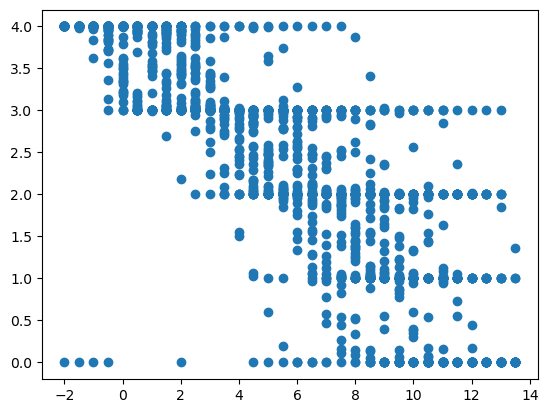

In [54]:
plt.scatter(x=df2_semi["hours_after_sunset"],y=df2_semi["food_availability"])
plt.show()

After plotting all the variables with high correlations, only hours after sunset to food availability have a correlation between each other. Hence, when the number of hours between sunset and the observation decreases, then the food availability is large.

## Step two: Bivariate analysis of different datatypes

1. Are there occurrences where bat start and rat start are different,and if so, what's the level of risk, reward, and the average bat landing to food seconds?

In [55]:
import datetime as dt

In [56]:
#converting time diff to minutes
df["time_diff"]=(df["time_diff"].dt.total_seconds())/60

In [57]:
min_time=min(df["time_diff"])
max_time=max(df["time_diff"])
print(f"The smallest time difference between bat start and rat arrival is {min_time} minutes")
print(f"The smallest time difference between bat start and rat arrival is {max_time} minutes")
df["time_diff"].describe()

The smallest time difference between bat start and rat arrival is 0.0 minutes
The smallest time difference between bat start and rat arrival is 16.0 minutes


count    738.000000
mean       4.638211
std        3.971814
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       16.000000
Name: time_diff, dtype: float64

Next I will create a copy of the dataframe with time diff, reward and risk. The create a new column called time_category, which will have three variables:
1. Short
2. Medium
3. Long
   
Each representing the time difference between bat and rat arrival. Then I will analyze the risk and reward associated with these three.
This can help determine if rats are food competitors for bats

In [58]:
time_analysis_df=df[["time_diff","reward","risk","bat_landing_to_food","habit"]]
bins=np.linspace(time_analysis_df["time_diff"].min(),time_analysis_df["time_diff"].max(),4)
labels=["Short","Medium","Long"]
time_analysis_df["time_cat"]=pd.cut(time_analysis_df["time_diff"],bins=bins,labels=labels,include_lowest=True)
time_analysis_df

C:\Users\SWRM\AppData\Local\Temp\ipykernel_9840\441633082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_analysis_df["time_cat"]=pd.cut(time_analysis_df["time_diff"],bins=bins,labels=labels,include_lowest=True)


time_diff reward risk  bat_landing_to_food habit time_cat
0          2.0      0    1            16.000000   rat    Short
1          1.0      1    0             0.074016  fast    Short
2          1.0      1    0             4.000000  fast    Short
3          2.0      0    1            10.000000   rat    Short
4          4.0      0    1            15.000000   rat    Short
..         ...    ...  ...                  ...   ...      ...
733        0.0      0    1             4.000000   rat    Short
734        4.0      0    1             2.000000   rat    Short
735        4.0      1    0             1.000000  fast    Short
736        5.0      1    0            22.000000  pick    Short
737        5.0      1    0             2.000000  fast    Short

[738 rows x 6 columns]

In [59]:
for n in ["Short","Medium","Long"]:
   min_val=time_analysis_df.loc[time_analysis_df["time_cat"]==n]["time_diff"].min()
   max_val=time_analysis_df.loc[time_analysis_df["time_cat"]==n]["time_diff"].max()
   print(f"Time cat {n}: min {min_val} .....max {max_val}") 


Time cat Short: min 0.0 .....max 5.0
Time cat Medium: min 6.0 .....max 10.0
Time cat Long: min 11.0 .....max 16.0


In [60]:

short_df=time_analysis_df.loc[time_analysis_df["time_cat"]=="Short"]
medium_df=time_analysis_df.loc[time_analysis_df["time_cat"]=="Medium"]
long_df=time_analysis_df.loc[time_analysis_df["time_cat"]=="Long"]

C:\Users\SWRM\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


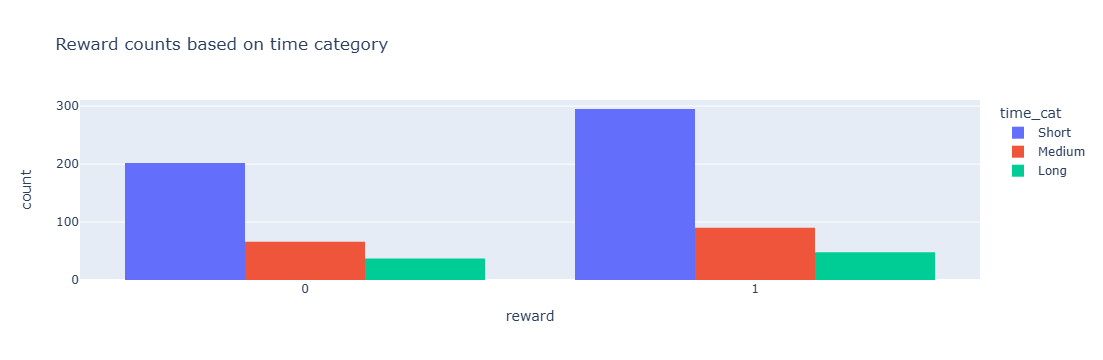

In [61]:
fig=pt.histogram(time_analysis_df,x="reward",color="time_cat",barmode="group",title="Reward counts based on time category")
fig.show()

C:\Users\SWRM\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



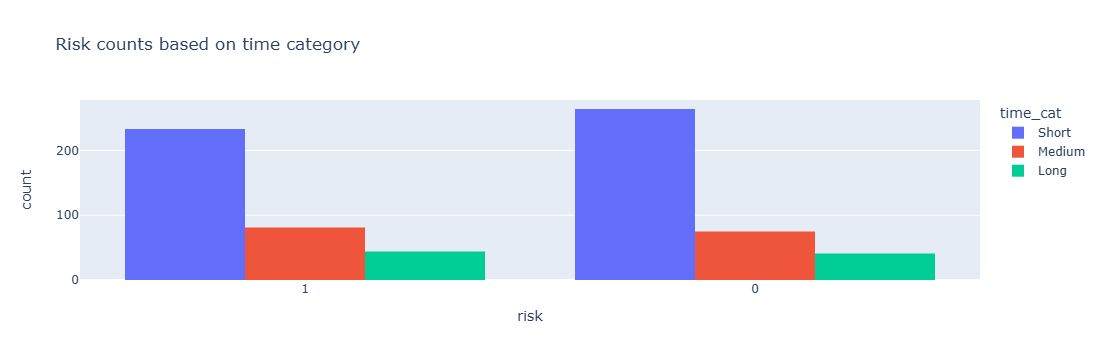

In [62]:
fig1=pt.histogram(time_analysis_df,x="risk",color="time_cat",barmode="group",title="Risk counts based on time category")
fig1.show()

In [63]:
short_df["time_diff"].value_counts()

time_diff
1.0    129
2.0    102
3.0     86
4.0     63
0.0     63
5.0     54
Name: count, dtype: int64

The short time period category has most of the data occurrences, both in rewards and risk. The difference in counts under "short" for reward is considerably more than that of risk.

From this we can just conclude that most occurrences of rats arriving after bats is within 0 to 6 seconds, with 129 counts in 1 second.

In [64]:
time_analysis_df.groupby("time_cat")["bat_landing_to_food"].describe()

C:\Users\SWRM\AppData\Local\Temp\ipykernel_9840\1273163098.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



count      mean       std       min  25%  50%   75%   max
time_cat                                                           
Short     497.0  5.791731  6.632002  0.010696  1.0  3.0   8.0  28.0
Medium    156.0  5.500908  6.151062  0.010871  1.0  3.0   7.0  28.0
Long       85.0  6.940021  7.215338  0.014551  1.0  4.0  11.0  26.0

## Conclusion to question 1: No insights

## Is there a variation in habit based on bat start hour?

In [65]:
temp_df=df.loc[(df["habit"]=="fast") | (df["habit"]=="rat") | (df["habit"]=="pick")]
pd.crosstab(index=temp_df["start_time_hour"],columns=temp_df["habit"])

habit            fast  pick  rat
start_time_hour                 
0                  36    27   37
1                  33    17   21
2                  35    27   21
3                  36    11   23
4                   5     7    6
5                   7     3    5
17                  1     0    0
18                  1     1    4
19                 18     3   16
20                 10     2   12
21                 12     7   20
22                 15     9   27
23                 36    15   13

## Come back to this later

## If we were to create two dataframes based on our perception of short and long time periods under bat landing to food column. Could we find distinct differences in the between these two dataframes amongst the categorical columns?

In [66]:
bat_landing_df=df[["time_diff","reward","risk","bat_landing_to_food","habit"]]
bins=np.linspace(bat_landing_df["bat_landing_to_food"].min(),bat_landing_df["bat_landing_to_food"].max(),4)
labels=["Short","Medium","Long"]
bat_landing_df["bat_landing_cat"]=pd.cut(bat_landing_df["bat_landing_to_food"],bins=bins,labels=labels,include_lowest=True)
bat_landing_df

C:\Users\SWRM\AppData\Local\Temp\ipykernel_9840\3235943772.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



time_diff reward risk  bat_landing_to_food habit bat_landing_cat
0          2.0      0    1            16.000000   rat          Medium
1          1.0      1    0             0.074016  fast           Short
2          1.0      1    0             4.000000  fast           Short
3          2.0      0    1            10.000000   rat          Medium
4          4.0      0    1            15.000000   rat          Medium
..         ...    ...  ...                  ...   ...             ...
733        0.0      0    1             4.000000   rat           Short
734        4.0      0    1             2.000000   rat           Short
735        4.0      1    0             1.000000  fast           Short
736        5.0      1    0            22.000000  pick            Long
737        5.0      1    0             2.000000  fast           Short

[738 rows x 6 columns]

In [67]:
for n in ["Short","Medium","Long"]:
   min_val=bat_landing_df.loc[bat_landing_df["bat_landing_cat"]==n]["bat_landing_to_food"].min()
   max_val=bat_landing_df.loc[bat_landing_df["bat_landing_cat"]==n]["bat_landing_to_food"].max()
   print(f"Time cat {n}: min {min_val} .....max {max_val}")

Time cat Short: min 0.010695699 .....max 9.0
Time cat Medium: min 10.0 .....max 18.0
Time cat Long: min 19.0 .....max 28.0


## Compare bat landing to food to habits

In [68]:
#analysis of each in comparison to habits
print("Analysis of bat landing category SHORT to habit")
print(bat_landing_df.loc[bat_landing_df["bat_landing_cat"]=="Short"]["habit"].value_counts().to_frame().head(5))

print("------------------------")

print("Analysis of bat landing category MEDIUM to habit")
print(bat_landing_df.loc[bat_landing_df["bat_landing_cat"]=="Medium"]["habit"].value_counts().to_frame().head(5))

print("-----------------------")

print("Analysis of bat landing category LONG to habit")
print(bat_landing_df.loc[bat_landing_df["bat_landing_cat"]=="Long"]["habit"].value_counts().to_frame().head(5))




Analysis of bat landing category SHORT to habit
           count
habit           
fast         242
rat          154
pick          86
bat           21
bat_fight     16
------------------------
Analysis of bat landing category MEDIUM to habit
              count
habit              
rat              36
pick             29
bat_and_pick      8
bat_fight         5
rat_and_bat       3
-----------------------
Analysis of bat landing category LONG to habit
                 count
habit                 
rat                 15
pick                14
bat_and_pick         3
rat_pick             3
pick_and_others      3


We can see that the FAST habit only occurs within the short bat landing to food time frame (betwen 0 to 9 seconds) and is no longer prominent in other categories. This is hinting to bats landinf time increases due to there being rats at the food platform.

In [69]:
pd.crosstab(index=bat_landing_df["bat_landing_cat"],columns=bat_landing_df["risk"])

risk               0    1
bat_landing_cat          
Short            333  246
Medium            31   74
Long              16   38

We see that under short the bats are move risk avoidant but under medium and long, they end up taking more risk

In [72]:
#Assessing top five habits to risk and reward
habits_df=bat_landing_df.loc[(bat_landing_df["habit"]=="fast") | (bat_landing_df["habit"]=="rat") | (bat_landing_df["habit"]=="pick") | (bat_landing_df["habit"]=="bat") | (bat_landing_df["habit"]=="bat_fight")]
pd.crosstab(index=habits_df["habit"],columns=habits_df["risk"])

risk         0    1
habit              
bat          0   26
bat_fight    0   23
fast       245    0
pick       129    0
rat          0  205

In [73]:
pd.crosstab(index=habits_df["habit"],columns=habits_df["reward"])

reward       0    1
habit              
bat         26    0
bat_fight   23    0
fast         0  245
pick         0  129
rat        205    0

In [74]:
#analyzing the counts of  the habits to each second under short
short_landing=bat_landing_df.loc[bat_landing_df["bat_landing_cat"]=="Short"]
bins=np.linspace(short_landing["bat_landing_to_food"].min(),short_landing["bat_landing_to_food"].max(),4)
labels=["Short","Medium","Long"]
short_landing["bat_landing_cat_two"]=pd.cut(short_landing["bat_landing_to_food"],bins=bins,labels=labels,include_lowest=True)
short_landing

for n in ["Short","Medium","Long"]:
   min_val=short_landing.loc[short_landing["bat_landing_cat_two"]==n]["bat_landing_to_food"].min()
   max_val=short_landing.loc[short_landing["bat_landing_cat_two"]==n]["bat_landing_to_food"].max()
   print(f"Time cat {n}: min {min_val} .....max {max_val}")

Time cat Short: min 0.010695699 .....max 3.0
Time cat Medium: min 4.0 .....max 6.0
Time cat Long: min 7.0 .....max 9.0


C:\Users\SWRM\AppData\Local\Temp\ipykernel_9840\529833191.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
#analysis of each in comparison to habits
print("Analysis of bat landing category SHORT to habit")
print(short_landing.loc[short_landing["bat_landing_cat_two"]=="Short"]["habit"].value_counts().to_frame().head(5))

print("------------------------")

print("Analysis of bat landing category MEDIUM to habit")
print(short_landing.loc[short_landing["bat_landing_cat_two"]=="Medium"]["habit"].value_counts().to_frame().head(5))

print("-----------------------")

print("Analysis of bat landing category LONG to habit")
print(short_landing.loc[short_landing["bat_landing_cat_two"]=="Long"]["habit"].value_counts().to_frame().head(5))

Analysis of bat landing category SHORT to habit
           count
habit           
fast         215
rat          100
pick          20
bat            9
bat_fight      8
------------------------
Analysis of bat landing category MEDIUM to habit
           count
habit           
pick          47
rat           33
fast          27
bat            7
bat_fight      6
-----------------------
Analysis of bat landing category LONG to habit
              count
habit              
rat              21
pick             19
bat               5
bat_and_pick      3
bat_and_rat       2


## What's the average time difference between rat start time and end time? Are they commonly small or large, if so, what are the common habits in relation to those trends, also other columns as well

analyse start time and rat end

In [77]:
def category_creator(df,column_name,create_column_name):
    bins=np.linspace(df[column_name].min(),df[column_name].max(),4)
    labels=["Short","Medium","Long"]
    df[create_column_name]=pd.cut(df[column_name],bins=bins,labels=labels,include_lowest=True)
    
    
    for n in ["Short","Medium","Long"]:
        min_val=df.loc[df[create_column_name]==n][column_name].min()
        max_val=df.loc[df[create_column_name]==n][column_name].max()
        print(f"Time cat {n}: min {min_val} .....max {max_val}")
    return df

In [78]:
rat_diff_df=category_creator(df,"rat_start_end_diff","rat_diff_cat")
rat_end_to_bat_start=category_creator(df,"rat_end_to_bat_start_diff","rat_bat_cat")

Time cat Short: min 0.0 .....max 19.0
Time cat Medium: min 20.0 .....max 34.0
Time cat Long: min 59.0 .....max 59.0
Time cat Short: min 0.0 .....max 16.0
Time cat Medium: min 17.0 .....max 28.0
Time cat Long: min 48.0 .....max 49.0


In [79]:
pd.crosstab(index=rat_end_to_bat_start["rat_bat_cat"],columns=rat_end_to_bat_start["risk"])

risk           0    1
rat_bat_cat          
Short        369  351
Medium        10    6
Long           1    1

In [80]:
pd.crosstab(index=rat_end_to_bat_start["rat_bat_cat"],columns=rat_end_to_bat_start["reward"])

reward         0    1
rat_bat_cat          
Short        299  421
Medium         6   10
Long           0    2

In [89]:
#analyzing habits that have rat in them in relation to reward and risk
rat_inclusive_habits=df.loc[(df['habit']=='rat') | (df['habit']=='pick_rat') | (df['habit']=='bat_and_rat') | (df['habit']=='rat_pick') | (df['habit']=='rat_and_bat') | (df['habit']=='pick_and_rat') | (df['habit']=='rat_and_pick')]
pd.crosstab(index=rat_inclusive_habits["habit"],columns=rat_inclusive_habits["risk"])

risk            1
habit            
bat_and_rat    15
pick_and_rat    5
pick_rat        3
rat           205
rat_and_bat    12
rat_and_pick    4
rat_pick        8

In [90]:
pd.crosstab(index=rat_inclusive_habits["habit"],columns=rat_inclusive_habits["reward"])

reward          0  1
habit               
bat_and_rat    15  0
pick_and_rat    0  5
pick_rat        0  3
rat           205  0
rat_and_bat    12  0
rat_and_pick    0  4
rat_pick        0  8

As we can see above, everything that has to do with a rat is considered a risk towards the bats, which shows an element of fear from the bats perspective. In addition to that, we notice that most of the time, anything habit that includes a rat leads to no reward for the bats.

This, along with point 1 to 5 from my books, shows that bats see rats as food competitors.

## DF2 bivariate analysis

In [91]:
df2_semi.head()

time  month  hours_after_sunset  bat_landing_number  \
0 2017-12-26 16:13:00+00:00      0                -0.5                  20   
1 2017-12-26 16:43:00+00:00      0                 0.0                  28   
2 2017-12-26 17:13:00+00:00      0                 0.5                  25   
3 2017-12-26 17:43:00+00:00      0                 1.0                  71   
4 2017-12-26 18:13:00+00:00      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number        date time_hour  \
0           4.000000          0.0                   0  26/12/2017     16:13   
1           4.000000          0.0                   0  26/12/2017     16:43   
2           4.000000          0.0                   0  26/12/2017     17:13   
3           4.000000          0.0                   0  26/12/2017     17:43   
4           3.753857          0.0                   0  26/12/2017     18:13   

   hour  
0    16  
1    16  
2    17  
3    17  
4    18

In [99]:
df2_semi.select_dtypes([int,float]).corr()

month  hours_after_sunset  bat_landing_number  \
month               1.000000           -0.076774           -0.139913   
hours_after_sunset -0.076774            1.000000           -0.129175   
bat_landing_number -0.139913           -0.129175            1.000000   
food_availability   0.067515           -0.845306            0.101158   
rat_minutes         0.191315            0.087519           -0.111263   
rat_arrival_number  0.223892            0.086520           -0.089415   
hour               -0.077230           -0.678544            0.180941   

                    food_availability  rat_minutes  rat_arrival_number  \
month                        0.067515     0.191315            0.223892   
hours_after_sunset          -0.845306     0.087519            0.086520   
bat_landing_number           0.101158    -0.111263           -0.089415   
food_availability            1.000000    -0.050906           -0.054056   
rat_minutes                 -0.050906     1.000000            0.655483   
rat_arrival_number          -0.054056     0.655483            1.000000   
hour                         0.597039    -0.092899           -0.106389   

                        hour  
month              -0.077230  
hours_after_sunset -0.678544  
bat_landing_number  0.180941  
food_availability   0.597039  
rat_minutes        -0.092899  
rat_arrival_number -0.106389  
hour                1.000000

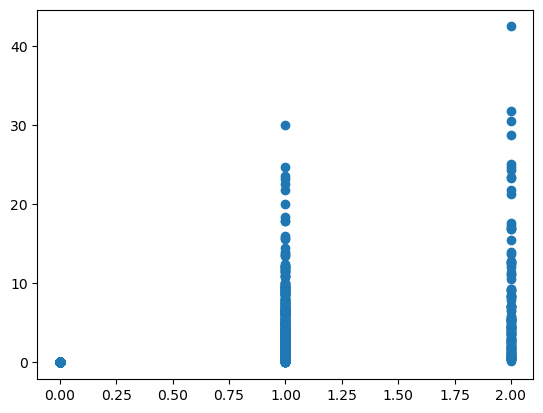

In [94]:
plt.scatter(y=df2_semi["rat_minutes"],x=df2_semi["rat_arrival_number"])
plt.show()

DF2 is useless

Maybe you can create an new dataframe, using dataframe 1 and under start time, you combine data ino 30 minute interval ranges, and merge with df2

In [ ]:


# 1. Correlation Matrix for Numeric Features in df1_cleaned
corr = df1_cleaned.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (df1_cleaned)")
plt.tight_layout()
plt.show()

# 2. Pairplot for Numeric Features in df1_cleaned
sns.pairplot(df1_cleaned.select_dtypes(include='number'), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features (df1_cleaned)", y=1.02)
plt.show()

# 3. Boxplots: Categorical vs Numeric Features in df1_cleaned
cat_cols = df1_cleaned.select_dtypes(include='object').columns
num_cols = df1_cleaned.select_dtypes(include='number').columns

for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df1_cleaned, palette='Set2')
        plt.title(f"{num_col} by {cat_col} (df1_cleaned)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

### Bivariate & Multivariate Analysis (df1_cleaned)

- **Correlation Matrix:**  
  Shows relationships between all numeric features in the cleaned dataset. Look for values close to 1 or -1 for strong correlation.

- **Pairplot:**  
  Visualizes pairwise relationships and distributions for all numeric columns in df1_cleaned.

- **Boxplots (Categorical vs Numeric):**  
  For every combination of categorical and numeric columns, these plots show how numeric features vary across categories. Useful for detecting group differences and potential predictors.

- **Tip:**  
  Use these insights to select features, engineer new ones, or address multicollinearity before modeling.

# Check for Relationships and Patterns 

In [ ]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Mean Bat Landing to Food by Season
# -----------------------------
season_group = df1_cleaned.groupby('season')['bat_landing_to_food'].mean()
season_group.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Average Bat Landing to Food by Season")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Season")
plt.show()

# -----------------------------
# 2. Mean Hours After Sunset by Habit
# -----------------------------
habit_group = df1_cleaned.groupby('habit')['hours_after_sunset'].mean()
habit_group.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')
plt.title("Average Hours After Sunset by Habit")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Habit")
plt.show()

# -----------------------------
# 3. Mean Bat Landing to Food by Risk
# -----------------------------
risk_group = df1_cleaned.groupby('risk')['bat_landing_to_food'].mean()
risk_group.plot(kind='bar', figsize=(8,5), color='lightgreen', edgecolor='black')
plt.title("Average Bat Landing to Food by Risk")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Risk")
plt.show()

# -----------------------------
# 4. Mean Hours After Sunset by Reward
# -----------------------------
reward_group = df1_cleaned.groupby('reward')['hours_after_sunset'].mean()
reward_group.plot(kind='bar', figsize=(8,5), color='salmon', edgecolor='black')
plt.title("Average Hours After Sunset by Reward")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Reward")
plt.show()

# -----------------------------
# 5. Mean Bat Landing to Food by Season and Risk (Grouped Bar)
# -----------------------------
grouped = df1_cleaned.groupby(['season', 'risk'])['bat_landing_to_food'].mean().unstack()
grouped.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title("Average Bat Landing to Food by Season and Risk")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xlabel("Season")
plt.legend(title="Risk")
plt.show()

# -----------------------------
# 6. Mean Hours After Sunset by Habit and Reward (Grouped Bar)
# -----------------------------
grouped2 = df1_cleaned.groupby(['habit', 'reward'])['hours_after_sunset'].mean().unstack()
grouped2.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title("Average Hours After Sunset by Habit and Reward")
plt.ylabel("Mean Hours After Sunset")
plt.xlabel("Habit")
plt.legend(title="Reward")
plt.show()


Interaction Plots for Categorical Features

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import builtins  # ensures we can use the original range

def safe_interaction_plot(x, trace, response, title, xlabel, ylabel):
    unique_traces = trace.unique()
    num_traces = len(unique_traces)
    
    # Generate enough colors and markers dynamically (repeat if needed)
    base_colors = plt.cm.tab10.colors  # 10 basic colors
    colors = [base_colors[i % len(base_colors)] for i in builtins.range(num_traces)]
    
    base_markers = ['o', 's', '^', 'D', 'P', '*', 'X', '<', '>', 'v']
    markers = [base_markers[i % len(base_markers)] for i in builtins.range(num_traces)]
    
    # Plot
    fig = interaction_plot(x, trace, response,
                           colors=colors,
                           markers=markers,
                           ms=8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Season vs Risk
safe_interaction_plot(df1_cleaned['season'], df1_cleaned['risk'], df1_cleaned['bat_landing_to_food'],
                      title="Interaction: Season vs Risk on Bat Landing to Food",
                      xlabel="Season",
                      ylabel="Bat Landing to Food (seconds)")

# Reward vs Habit
safe_interaction_plot(df1_cleaned['reward'], df1_cleaned['habit'], df1_cleaned['hours_after_sunset'],
                      title="Interaction: Reward vs Habit on Hours After Sunset",
                      xlabel="Reward",
                      ylabel="Hours After Sunset")


# Time Based Trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️ Convert columns to datetime ---
df1_cleaned['start_time'] = pd.to_datetime(df1_cleaned['start_time'])
df1_cleaned['rat_period_start'] = pd.to_datetime(df1_cleaned['rat_period_start'])
df1_cleaned['rat_period_end'] = pd.to_datetime(df1_cleaned['rat_period_end'])
df1_cleaned['start_date'] = pd.to_datetime(df1_cleaned['start_date'])
df1_cleaned['sunset_time'] = pd.to_datetime(df1_cleaned['sunset_time'])

# --- 2️ Daily trends ---
daily_trend = df1_cleaned.groupby(df1_cleaned['start_date'].dt.date)['bat_landing_to_food'].mean()
daily_trend.plot(figsize=(10,5), color='skyblue', marker='o')
plt.title("Daily Mean Bat Landing to Food")
plt.xlabel("Date")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xticks(rotation=45)
plt.show()

# --- 3️ Monthly trends ---
monthly_trend = df1_cleaned.groupby(df1_cleaned['start_date'].dt.to_period('M'))['hours_after_sunset'].mean()
monthly_trend.plot(figsize=(10,5), color='orange', marker='s')
plt.title("Monthly Mean Hours After Sunset")
plt.xlabel("Month")
plt.ylabel("Mean Hours After Sunset")
plt.xticks(rotation=45)
plt.show()

# --- 4️ Hour-of-day trends ---
df1_cleaned['start_hour'] = df1_cleaned['start_time'].dt.hour
hourly_trend = df1_cleaned.groupby('start_hour')['bat_landing_to_food'].mean()
hourly_trend.plot(figsize=(10,5), color='green', marker='^')
plt.title("Average Bat Landing to Food by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.show()

# --- 5️ Rat period duration trends ---
df1_cleaned['rat_period_duration'] = (df1_cleaned['rat_period_end'] - df1_cleaned['rat_period_start']).dt.total_seconds() / 60
df1_cleaned.plot.scatter(x='rat_period_duration', y='bat_landing_to_food', figsize=(10,5), color='purple')
plt.title("Bat Landing to Food vs Rat Period Duration")
plt.xlabel("Rat Period Duration (minutes)")
plt.ylabel("Bat Landing to Food (seconds)")
plt.show()

# --- 6️ Seasonal trends over months ---
season_month = df1_cleaned.groupby([df1_cleaned['start_date'].dt.to_period('M'), 'season'])['bat_landing_to_food'].mean().unstack()
season_month.plot(figsize=(10,6), marker='o')
plt.title("Monthly Bat Landing to Food by Season")
plt.xlabel("Month")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.xticks(rotation=45)
plt.show()

# --- 7️ Sunset-related trends ---
df1_cleaned.plot.scatter(x='hours_after_sunset', y='bat_landing_to_food', figsize=(10,5), color='red')
plt.title("Bat Landing to Food vs Hours After Sunset")
plt.xlabel("Hours After Sunset")
plt.ylabel("Bat Landing to Food (seconds)")
plt.show()

# --- 8️ Weekly trends ---
df1_cleaned['weekday'] = df1_cleaned['start_date'].dt.day_name()
weekday_trend = df1_cleaned.groupby('weekday')['bat_landing_to_food'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_trend.plot(kind='bar', figsize=(8,5), color='cyan', edgecolor='black')
plt.title("Average Bat Landing to Food by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Mean Bat Landing to Food (seconds)")
plt.show()
